### GPU check # if u got and cuda stuff python  version 9 - 12 cuda support to 12.8

set up cuda  tk & cuDNN 9.8.0
https://pytorch.org/get-started/locally/

In [1]:
import torch
print("CUDA Available:", torch.cuda.is_available())

x = torch.rand(5, 3)
print(x)

CUDA Available: True
tensor([[0.3709, 0.1394, 0.1660],
        [0.0386, 0.6937, 0.9908],
        [0.7754, 0.9097, 0.4102],
        [0.3265, 0.7611, 0.6480],
        [0.8423, 0.8747, 0.5839]])


In [1]:
!nvidia-smi

Sun May 11 18:17:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.28                 Driver Version: 576.28         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   42C    P8              3W /  140W |     196MiB /   6141MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#### Torchvision checking

In [2]:
import torch
import torchvision

print("Torch version:", torch.__version__)
print("Torch CUDA available:", torch.cuda.is_available())
print("Torchvision version:", torchvision.__version__)


Torch version: 2.7.0+cu128
Torch CUDA available: True
Torchvision version: 0.22.0+cu128


In [3]:
import torch
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2025 NVIDIA Corporation
Built on Fri_Feb_21_20:42:46_Pacific_Standard_Time_2025
Cuda compilation tools, release 12.8, V12.8.93
Build cuda_12.8.r12.8/compiler.35583870_0
torch:  2.7 ; cuda:  cu128


#### GPU usage cheack

In [4]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA GeForce RTX 4050 Laptop GPU
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [5]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.122  Python-3.12.10 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Setup complete  (16 CPUs, 15.2 GB RAM, 182.4/931.5 GB disk)


In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11n.pt")


100%|██████████| 5.35M/5.35M [00:00<00:00, 8.15MB/s]


### NCNN MODEL EXPORT

In [ ]:
# from ultralytics import YOLO

# # Load the YOLO11 model
# model = YOLO("yolo11n.pt")

# # Export the model to NCNN format
# model.export(format="ncnn")  # creates '/yolo11n_ncnn_model'

# # Load the exported NCNN model
# ncnn_model = YOLO("./yolo11n_ncnn_model")

# # # Run inference
# # results = ncnn_model("https://ultralytics.com/images/bus.jpg")

# # Run inference
# results = ncnn_model("people1.jpg")


Ultralytics 8.3.122  Python-3.12.10 torch-2.7.0+cu128 CPU (AMD Ryzen 7 7735HS with Radeon Graphics)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)

TorchScript: starting export with torch 2.7.0+cu128...
TorchScript: export success  1.9s, saved as 'yolo11n.torchscript' (10.6 MB)

NCNN: starting export with NCNN 1.0.20250428...
NCNN: running 'D:\image processing\image-processing-assignment-\.venv\Lib\site-packages\ultralytics\pnnx.exe yolo11n.torchscript ncnnparam=yolo11n_ncnn_model\model.ncnn.param ncnnbin=yolo11n_ncnn_model\model.ncnn.bin ncnnpy=yolo11n_ncnn_model\model_ncnn.py pnnxparam=yolo11n_ncnn_model\model.pnnx.param pnnxbin=yolo11n_ncnn_model\model.pnnx.bin pnnxpy=yolo11n_ncnn_model\model_pnnx.py pnnxonnx=yolo11n_ncnn_model\model.pnnx.onnx fp16=0 device=cpu inputshape="[1, 3, 640, 640]"'
NCNN: export success  2.0s, saved as 'y

In [ ]:
# from ultralytics import YOLO
# ncnn_model = YOLO("./yolo11n_ncnn_model")
# results = ncnn_model("people1.jpg", task  = "detect")


WARNING Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading yolo11n_ncnn_model for NCNN inference...

image 1/1 d:\image processing\image-processing-assignment-\people1.jpg: 640x640 15 persons, 2 backpacks, 3 handbags, 42.5ms
Speed: 3.0ms preprocess, 42.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# import cv2
# results[0].save(filename='output3.jpg')  # save to disk

# # Display the result with OpenCV
# output_image = cv2.imread('output3.jpg')
# cv2.imshow('YOLO Detection', output_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Export the model_ONNX format

In [ ]:

from ultralytics import YOLO

# Load the YOLO11 model
model = YOLO("yolo11n.pt")

# Export the model to NCNN format
model.export(format="onnx")

# Load the exported NCNN model
onnx_model = YOLO("yolo11n.onnx")

# # Run inference


# Run inference
results = onnx_model("people1.jpg",device='0')
results[0].show()

Ultralytics 8.3.122  Python-3.12.10 torch-2.7.0+cu128 CPU (AMD Ryzen 7 7735HS with Radeon Graphics)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.50...
ONNX: export success  0.9s, saved as 'yolo11n.onnx' (10.2 MB)

Export complete (1.2s)
Results saved to D:\image processing\image-processing-assignment-
Predict:         yolo predict task=detect model=yolo11n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolo11n.onnx imgsz=640 data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app
WARNING Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading yolo11n.onnx for ONNX Runtime infere

In [3]:
from ultralytics import YOLO
onnx_model = YOLO("yolo11n.onnx")

# # Run inference


# Run inference
results = onnx_model("people1.jpg",task = "detect",device='0')
results[0].show()

WARNING Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading yolo11n.onnx for ONNX Runtime inference...
Using ONNX Runtime CUDAExecutionProvider

image 1/1 d:\image processing\image-processing-assignment-\people1.jpg: 640x640 15 persons, 2 backpacks, 3 handbags, 73.9ms
Speed: 3.9ms preprocess, 73.9ms inference, 16.9ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
results = onnx_model("people1.jpg,device")
results[0].show()

## other

In [2]:
from ultralytics import YOLO

# Load the YOLO11 model
model = YOLO("yolo11n.pt")
results = model("people1.jpg",device='0')
results[0].show()


image 1/1 d:\image processing\image-processing-assignment-\people1.jpg: 384x640 15 persons, 2 backpacks, 3 handbags, 41.9ms
Speed: 3.0ms preprocess, 41.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


In [4]:
import cv2
results[0].save(filename='output3.jpg')  # save to disk

# Display the result with OpenCV
output_image = cv2.imread('output2.jpg')
cv2.imshow('YOLO Detection', output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### supervision box annotator 

## Supervision with yolo 8 
 pip install -q ultralytics supervision==0.18.0

In [16]:
import numpy as np
import supervision as sv

from ultralytics import YOLO
from supervision.assets import download_assets, VideoAssets

In [17]:
SOURCE_VIDEO_PATH = "The CCTV People Demo 2.mp4"

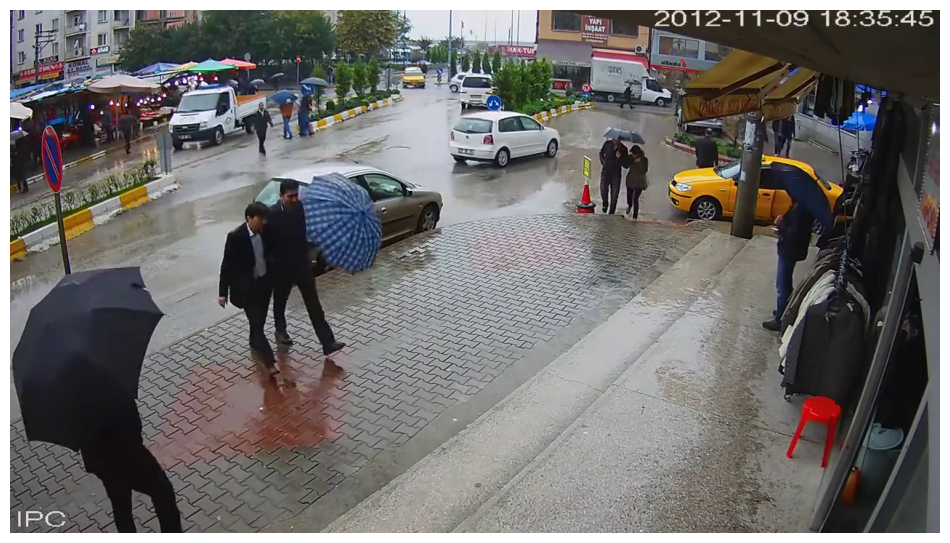

In [19]:
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH,start=1300)
frame = next(generator)


sv.plot_image(frame, (12, 12))

In [20]:
sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=1280, height=720, fps=25, total_frames=1935)

In [ ]:
model = YOLO("yolov8x.pt")

results = model(frame, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)

In [21]:
model = YOLO("yolo11n.pt")

results = model(frame, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)

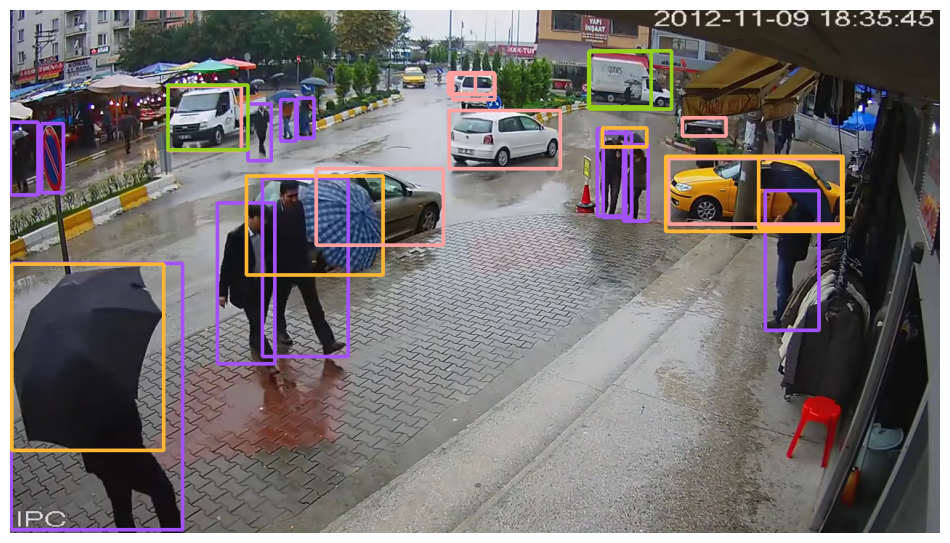

In [22]:
bounding_box_annotator = sv.BoundingBoxAnnotator(thickness=3)
annotated_frame = bounding_box_annotator.annotate(frame.copy(), detections)
sv.plot_image(annotated_frame, (12, 12))

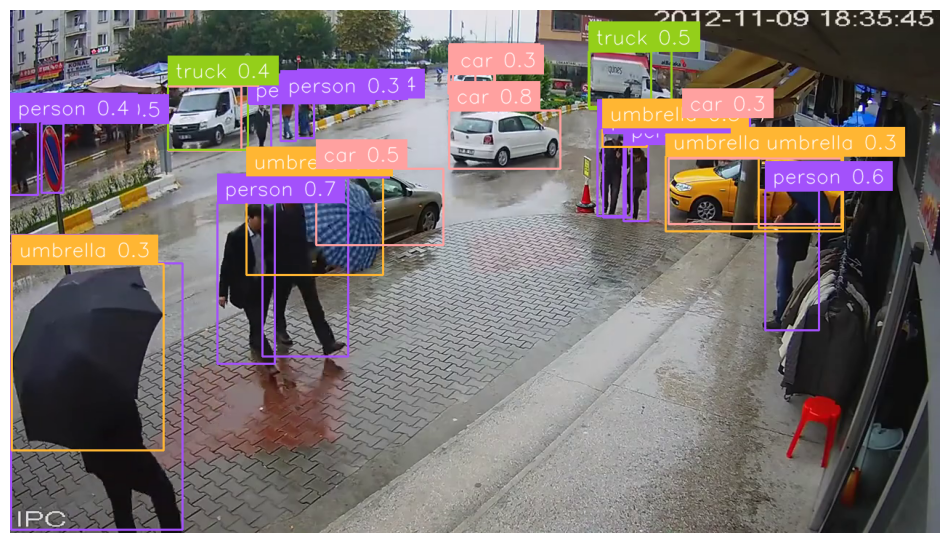

In [23]:
# labels = [
#     f"{results.names[class_id]} {confidence:0.2f}"
#     for class_id, confidence
#     in zip(detections.class_id, detections.confidence)
# ]
labels = [
    f"{results.names[class_id]} {confidence:0.1f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]


bounding_box_annotator = sv.BoundingBoxAnnotator(thickness=2)
label_annotator = sv.LabelAnnotator(text_thickness=1, text_scale=0.9)

annotated_frame = frame.copy()
annotated_frame = bounding_box_annotator.annotate(annotated_frame, detections)
annotated_frame = label_annotator.annotate(annotated_frame, detections, labels)
sv.plot_image(annotated_frame, (12, 12))

In [24]:
sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=1280, height=720, fps=25, total_frames=1935)

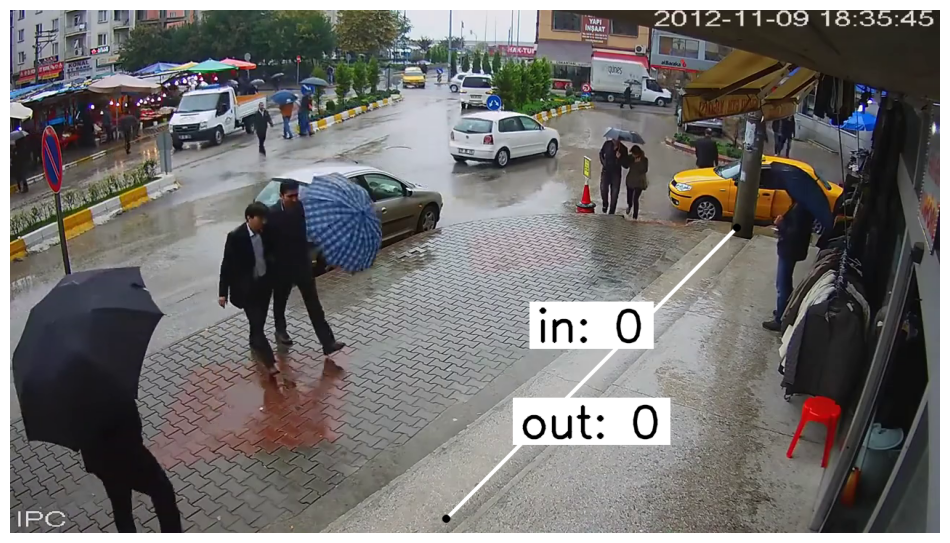

In [25]:
START = sv.Point(1000, 300)
END = sv.Point(600 , 700)

line_zone = sv.LineZone(start=START, end=END)

line_zone_annotator = sv.LineZoneAnnotator(
    thickness=4,
    text_thickness=4,
    text_scale=2)

annotated_frame = frame.copy()
annotated_frame = line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)
sv.plot_image(annotated_frame, (12, 12))

In [28]:
byte_tracker = sv.ByteTrack()

In [36]:

trace_annotator = sv.TraceAnnotator(thickness=4)

bounding_box_annotator = sv.BoundingBoxAnnotator(thickness=2)
label_annotator = sv.LabelAnnotator(text_thickness=1, text_scale=0.9)

In [37]:
def callback(frame: np.ndarray, index:int) -> np.ndarray:
    results = model(frame, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = byte_tracker.update_with_detections(detections)

    labels = [
        f"#{tracker_id} {model.model.names[class_id]} {confidence:0.2f}"
        for confidence, class_id, tracker_id
        in zip(detections.confidence, detections.class_id, detections.tracker_id)
    ]

    annotated_frame = frame.copy()
    annotated_frame = trace_annotator.annotate(
        scene=annotated_frame,
        detections=detections)
    annotated_frame = bounding_box_annotator.annotate(
        scene=annotated_frame,
        detections=detections)
    annotated_frame = label_annotator.annotate(
        scene=annotated_frame,
        detections=detections,
        labels=labels)

    line_zone.trigger(detections)

    return  line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)

In [38]:
def callback(frame: np.ndarray, index: int) -> np.ndarray:
    results = model(frame, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    
    # Filter for people only (assuming class_id 0 is 'person')
    is_person = detections.class_id == 0
    detections = detections[is_person]
    
    detections = byte_tracker.update_with_detections(detections)

    labels = [
        f"#{tracker_id} {model.model.names[class_id]} {confidence:0.4f}"
        for confidence, class_id, tracker_id
        in zip(detections.confidence, detections.class_id, detections.tracker_id)
    ]

    annotated_frame = frame.copy()
    annotated_frame = trace_annotator.annotate(
        scene=annotated_frame,
        detections=detections
    )
    annotated_frame = bounding_box_annotator.annotate(
        scene=annotated_frame,
        detections=detections
    )
    annotated_frame = label_annotator.annotate(
        scene=annotated_frame,
        detections=detections,
        labels=labels
    )

    line_zone.trigger(detections)

    return line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)


In [39]:
TARGET_VIDEO_PATH = "count-objects.mp4"

In [40]:
sv.process_video(
    source_path = SOURCE_VIDEO_PATH,
    target_path = TARGET_VIDEO_PATH,
    callback=callback
)

## test 

In [3]:
from ultralytics import YOLO
import supervision as sv
import cv2

def detect_people_camera():
    # Load YOLO model
    model = YOLO("yolo11n.pt")

    # Supervision annotator for bounding boxes
    box_annotator = sv.BoxAnnotator(thickness=2, text_thickness=1, text_scale=0.5)

    # Open webcam
    cap = cv2.VideoCapture(0)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture from camera.")
            break

        # Run person detection
        results = model.predict(frame, classes=[0], conf=0.35, device='0')

        for result in results:
            detections = sv.Detections.from_ultralytics(result)

            # Count people
            person_count = len(detections)

            # Prepare labels
            labels = [
                f"{model.model.names[class_id]} {confidence:.2f}"
                for class_id, confidence in zip(detections.class_id, detections.confidence)
            ]

            # Annotate frame
            frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)

            # Draw count text
            cv2.putText(frame, f'People Count: {person_count}', (20, 40),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Show frame
        cv2.imshow('Real-time People Detection', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Cleanup
    cap.release()
    cv2.destroyAllWindows()

# Run the function
detect_people_camera()



0: 480x640 1 person, 52.9ms
Speed: 2.4ms preprocess, 52.9ms inference, 301.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 9.4ms
Speed: 5.3ms preprocess, 9.4ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 8.7ms
Speed: 1.4ms preprocess, 8.7ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 9.5ms
Speed: 1.4ms preprocess, 9.5ms inference, 3.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 10.5ms
Speed: 1.2ms preprocess, 10.5ms inference, 3.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 9.3ms
Speed: 1.3ms preprocess, 9.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 7.8ms
Speed: 1.2ms preprocess, 7.8ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)

0

## pratical assessment idea

001

In [1]:
import cv2
import numpy as np
from ultralytics import YOLO
import supervision as sv

# --- Global Variables ---
drawing = False
roi_points = []
polygon_zone = None
model = YOLO("yolo11n.pt")
tracker = sv.ByteTrack()

# --- Mouse Callback for Polygon Drawing ---
def draw_polygon(event, x, y, flags, param):
    global drawing, roi_points, polygon_zone, frame

    if event == cv2.EVENT_LBUTTONDOWN:
        roi_points.append((x, y))
        cv2.circle(frame, (x, y), 3, (0, 255, 0), -1)
        if len(roi_points) > 1:
            cv2.line(frame, roi_points[-2], roi_points[-1], (255, 0, 0), 2)
        cv2.imshow("Draw Zone - Press 'c' to Confirm", frame)

# --- Main Program ---
def main():
    global drawing, roi_points, polygon_zone, frame

    cap = cv2.VideoCapture(0)

    # Draw ROI first
    print("Draw your polygonal zone by clicking on the video window. Press 'c' when done.")
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Camera error.")
            return

        temp = frame.copy()
        cv2.namedWindow("Draw Zone - Press 'c' to Confirm")
        cv2.setMouseCallback("Draw Zone - Press 'c' to Confirm", draw_polygon)
        cv2.imshow("Draw Zone - Press 'c' to Confirm", temp)

        key = cv2.waitKey(1) & 0xFF
        if key == ord('c') and len(roi_points) >= 3:
            polygon = np.array(roi_points)
            polygon_zone = sv.PolygonZone(polygon=polygon, frame_resolution_wh=(frame.shape[1], frame.shape[0]))
            break
        elif key == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            return

    print("Zone confirmed. Starting detection...")

    # Detection loop
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        result = model.predict(frame, classes=[0], conf=0.3, device='0')[0]
        detections = sv.Detections.from_ultralytics(result)
        detections = tracker.update_with_detections(detections)

        # Draw polygon zone
        cv2.polylines(frame, [polygon], isClosed=True, color=(0, 255, 255), thickness=2)

        # Trigger zone and count
        is_in_zone = polygon_zone.trigger(detections)
        count = polygon_zone.current_count

        # Draw bounding boxes
        for i, box in enumerate(detections.xyxy):
            if is_in_zone[i]:
                x1, y1, x2, y2 = map(int, box)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Show count
        cv2.putText(frame, f"People in zone: {count}", (20, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        cv2.imshow("People Counter", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


Draw your polygonal zone by clicking on the video window. Press 'c' when done.
Zone confirmed. Starting detection...

0: 480x640 2 persons, 49.6ms
Speed: 3.1ms preprocess, 49.6ms inference, 85.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 9.5ms
Speed: 1.2ms preprocess, 9.5ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 9.8ms
Speed: 1.1ms preprocess, 9.8ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 7.8ms
Speed: 1.2ms preprocess, 7.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 7.8ms
Speed: 1.2ms preprocess, 7.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 7.8ms
Speed: 1.0ms preprocess, 7.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 48

002

In [3]:
import cv2
import numpy as np
from ultralytics import YOLO
import supervision as sv
import tkinter as tk
from tkinter import filedialog

# --- Global Variables ---
roi_points = []
polygon_zone = None
drawing_done = False
model = YOLO("yolo11n.pt")  # Use an official model to avoid load errors
tracker = sv.ByteTrack()
frame = None
polygon = None

# --- Mouse Callback for Polygon Drawing ---
def draw_polygon(event, x, y, flags, param):
    global roi_points, frame, drawing_done

    if drawing_done:
        return

    if event == cv2.EVENT_LBUTTONDOWN:
        roi_points.append((x, y))
        cv2.circle(frame, (x, y), 3, (0, 255, 0), -1)
        if len(roi_points) > 1:
            cv2.line(frame, roi_points[-2], roi_points[-1], (255, 0, 0), 2)
        cv2.imshow("Draw Zone - Press 'c' to Confirm", frame)

# --- Main Program ---
def main():
    global frame, roi_points, polygon_zone, drawing_done, polygon

    # File selection dialog
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(title="Select an image", filetypes=[("Image files", "*.jpg *.png *.jpeg")])
    if not file_path:
        print("No file selected.")
        return

    frame = cv2.imread(file_path)
    if frame is None:
        print("Image could not be loaded.")
        return

    # Step 1: ROI Drawing
    print("Click to draw a polygonal zone on the image. Press 'c' when done.")
    cv2.namedWindow("Draw Zone - Press 'c' to Confirm")
    cv2.setMouseCallback("Draw Zone - Press 'c' to Confirm", draw_polygon)

    while True:
        temp = frame.copy()
        for i in range(1, len(roi_points)):
            cv2.line(temp, roi_points[i - 1], roi_points[i], (255, 0, 0), 2)
        for pt in roi_points:
            cv2.circle(temp, pt, 3, (0, 255, 0), -1)

        cv2.imshow("Draw Zone - Press 'c' to Confirm", temp)
        key = cv2.waitKey(1) & 0xFF
        if key == ord('c') and len(roi_points) >= 3:
            polygon = np.array(roi_points)
            polygon_zone = sv.PolygonZone(polygon=polygon, frame_resolution_wh=(frame.shape[1], frame.shape[0]))
            drawing_done = True
            break
        elif key == ord('q'):
            cv2.destroyAllWindows()
            return

    # Step 2: Detection and Zone Count
    print("Running detection...")

    result = model.predict(frame, classes=[0], conf=0.2, device="cpu")[0]
    detections = sv.Detections.from_ultralytics(result)
    detections = tracker.update_with_detections(detections)

    is_in_zone = polygon_zone.trigger(detections)
    count = polygon_zone.current_count

    # Draw polygon and bounding boxes
    output = frame.copy()
    cv2.polylines(output, [polygon], isClosed=True, color=(0, 255, 255), thickness=2)

    for i, box in enumerate(detections.xyxy):
        if is_in_zone[i]:
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(output, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Show count
    cv2.putText(output, f"People in zone: {count}", (20, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    cv2.imshow("People Counter", output)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


Click to draw a polygonal zone on the image. Press 'c' when done.
Running detection...

0: 384x640 15 persons, 42.7ms
Speed: 3.0ms preprocess, 42.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


upload video it works 

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
import supervision as sv
import tkinter as tk
from tkinter import filedialog
import torch

# --- Global Variables ---
roi_points = []
polygon_zone = None
drawing_done = False
polygon = None
model = YOLO("yolo11n.pt")  
tracker = sv.ByteTrack()

# --- Mouse Callback for Polygon Drawing ---
def draw_polygon(event, x, y, flags, param):
    global roi_points, frame, drawing_done

    if drawing_done:
        return

    if event == cv2.EVENT_LBUTTONDOWN:
        roi_points.append((x, y))
        cv2.circle(frame, (x, y), 3, (0, 255, 0), -1)
        if len(roi_points) > 1:
            cv2.line(frame, roi_points[-2], roi_points[-1], (255, 0, 0), 2)
        cv2.imshow("Draw Zone - Press 'c' to Confirm", frame)

# --- Main Program ---
def main():
    global roi_points, polygon_zone, drawing_done, polygon, frame

    # File selection dialog
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(title="Select a video", filetypes=[("Video files", "*.mp4 *.avi *.mov")])
    if not file_path:
        print("No file selected.")
        return

    cap = cv2.VideoCapture(file_path)
    ret, frame = cap.read()
    if not ret:
        print("Error reading video.")
        return

    # Step 1: ROI Drawing on First Frame
    print("Click to draw a polygonal zone on the first frame. Press 'c' when done.")
    cv2.namedWindow("Draw Zone - Press 'c' to Confirm")
    cv2.setMouseCallback("Draw Zone - Press 'c' to Confirm", draw_polygon)

    while True:
        temp = frame.copy()
        for i in range(1, len(roi_points)):
            cv2.line(temp, roi_points[i - 1], roi_points[i], (255, 0, 0), 2)
        for pt in roi_points:
            cv2.circle(temp, pt, 3, (0, 255, 0), -1)

        cv2.imshow("Draw Zone - Press 'c' to Confirm", temp)
        key = cv2.waitKey(1) & 0xFF
        if key == ord('c') and len(roi_points) >= 3:
            polygon = np.array(roi_points)
            polygon_zone = sv.PolygonZone(polygon=polygon, frame_resolution_wh=(frame.shape[1], frame.shape[0]))
            drawing_done = True
            break
        elif key == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            return

    # Step 2: Process Video Frames
    print("Running detection on video...")

    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)  # Rewind to first frame
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        result = model.predict(frame, classes=[0], conf=0.4, device="1")[0]
        detections = sv.Detections.from_ultralytics(result)
        detections = tracker.update_with_detections(detections)

        # Trigger zone and count
        is_in_zone = polygon_zone.trigger(detections)
        count = polygon_zone.current_count

        # Draw polygon and bounding boxes
        cv2.polylines(frame, [polygon], isClosed=True, color=(0, 255, 255), thickness=2)
        for i, box in enumerate(detections.xyxy):
            if is_in_zone[i]:
                x1, y1, x2, y2 = map(int, box)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Show count
        cv2.putText(frame, f"People in zone: {count}", (20, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        cv2.imshow("People Counter", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


Click to draw a polygonal zone on the first frame. Press 'c' when done.
Running detection on video...
Ultralytics 8.3.122  Python-3.12.10 torch-2.7.0+cu128 


ValueError: Invalid CUDA 'device=1' requested. Use 'device=cpu' or pass valid CUDA device(s) if available, i.e. 'device=0' or 'device=0,1,2,3' for Multi-GPU.

torch.cuda.is_available(): False
torch.cuda.device_count(): 0
os.environ['CUDA_VISIBLE_DEVICES']: None
See https://pytorch.org/get-started/locally/ for up-to-date torch install instructions if no CUDA devices are seen by torch.


: 

refine

no nice 

In [2]:
import cv2
import numpy as np
from ultralytics import YOLO
import supervision as sv
import time

# --- Configuration ---
MODEL_PATH = "yolo11n.pt" 
WEBCAM_ID = 0
CONFIDENCE_THRESHOLD = 0.3
TARGET_CLASS = 0

# --- Global Variables ---
roi_points = []
polygon_zone = None
polygon_np = None

# --- Mouse Callback ---
def draw_polygon_callback(event, x, y, flags, param):
    global roi_points
    if event == cv2.EVENT_LBUTTONDOWN:
        roi_points.append((x, y))

# --- Main Program ---
def main():
    global roi_points, polygon_zone, polygon_np

    # --- Model and Tracker Initialization ---
    try:
        model = YOLO(MODEL_PATH)
        print(f"Model '{MODEL_PATH}' loaded successfully.")
    except Exception as e:
        print(f"Error loading YOLO model: {e}")
        return

    tracker = sv.ByteTrack()
    # Annotators for drawing (Initialize zone_annotator later)
    box_annotator = sv.BoundingBoxAnnotator()
    label_annotator = sv.LabelAnnotator()
    trace_annotator = sv.TraceAnnotator() # Optional
    zone_annotator = None # Initialize as None HERE

    # --- Webcam Initialization ---
    cap = cv2.VideoCapture(WEBCAM_ID)
    if not cap.isOpened():
        print(f"Error: Could not open webcam with ID {WEBCAM_ID}.")
        return

    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture initial frame.")
        cap.release()
        return
    frame_height, frame_width, _ = frame.shape
    frame_resolution_wh = (frame_width, frame_height)

    # --- ROI Definition Phase ---
    drawing_window_name = "Draw Zone - Click points, Press 'c' to Confirm, 'r' to Reset, 'q' to Quit"
    cv2.namedWindow(drawing_window_name)
    cv2.setMouseCallback(drawing_window_name, draw_polygon_callback)

    print("\n--- Define ROI ---")
    # ...(instructions)...

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Frame stream ended during ROI definition.")
            break

        draw_frame = frame.copy()
        # ...(drawing points and lines on draw_frame)...
        # Draw existing points
        for point in roi_points:
            cv2.circle(draw_frame, point, 5, (0, 255, 0), -1) # Green filled circle

        # Draw lines between points
        if len(roi_points) > 1:
            cv2.polylines(draw_frame, [np.array(roi_points)], isClosed=False, color=(255, 0, 0), thickness=2) # Blue lines

        # Draw closing line hint if enough points
        if len(roi_points) >= 3:
             cv2.line(draw_frame, roi_points[-1], roi_points[0], (0, 0, 255), 2) # Red closing line hint


        cv2.imshow(drawing_window_name, draw_frame)
        key = cv2.waitKey(1) & 0xFF

        if key == ord('c') and len(roi_points) >= 3:
            polygon_np = np.array(roi_points)
            # Create the PolygonZone
            polygon_zone = sv.PolygonZone(polygon=polygon_np, frame_resolution_wh=frame_resolution_wh)

            # *** Initialize PolygonZoneAnnotator HERE, now that polygon_zone exists ***
            zone_annotator = sv.PolygonZoneAnnotator(
                zone=polygon_zone, # Pass the created zone
                color=sv.Color.RED,
                thickness=2,
                text_thickness=2, # Adjusted for visibility
                text_scale=1      # Adjusted for visibility
            )
            print(f"Zone confirmed with {len(roi_points)} points.")
            break
        elif key == ord('r'):
            roi_points = []
            print("Points reset.")
        elif key == ord('q'):
            print("Quitting program.")
            cap.release()
            cv2.destroyAllWindows()
            return

    cv2.destroyWindow(drawing_window_name)

    # --- Detection and Tracking Phase ---
    # Add a check here in case the drawing window was closed without confirming ('c')
    if polygon_zone is None or zone_annotator is None:
        print("No valid zone defined or annotator not initialized. Exiting.")
        cap.release()
        cv2.destroyAllWindows()
        return

    print("\n--- Starting Detection and Tracking ---")
    detection_window_name = "People Counter - Press 'q' to Quit"

    while True:
        start_time = time.time()
        ret, frame = cap.read()
        if not ret:
            print("Error: Frame stream ended.")
            break

        results = model(frame, classes=[TARGET_CLASS], conf=CONFIDENCE_THRESHOLD, device='0', verbose=False)[0]
        detections = sv.Detections.from_ultralytics(results)
        detections = tracker.update_with_detections(detections)
        detections_in_zone = polygon_zone.trigger(detections=detections)

        # --- Annotation ---
        annotated_frame = frame.copy() # Start annotation on a fresh copy

        # Annotate the zone using the now initialized annotator
        # The zone_annotator can now draw the polygon and potentially the count itself
        annotated_frame = zone_annotator.annotate(scene=annotated_frame)

        # Filter detections for those inside the zone
        filtered_detections = detections[detections_in_zone]

        # Annotate bounding boxes and labels for detections IN the zone
        annotated_frame = box_annotator.annotate(scene=annotated_frame, detections=filtered_detections)
        # Create labels with tracker IDs for those inside
        labels_in_zone = [f"#{tid}" for tid in filtered_detections.tracker_id]
        annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=filtered_detections, labels=labels_in_zone)
        # annotated_frame = trace_annotator.annotate(scene=annotated_frame, detections=filtered_detections) # Optional traces


        # --- Display Count (Can be redundant if zone_annotator shows it, but good for clarity) ---
        # count = polygon_zone.current_count # Already fetched by zone_annotator usually
        # cv2.putText(annotated_frame, f"People in zone: {count}", (30, 50),
        #             cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 3, cv2.LINE_AA)


        # --- Calculate and Display FPS (Optional) ---
        end_time = time.time()
        fps = 1.0 / (end_time - start_time) if (end_time - start_time) > 0 else 0
        cv2.putText(annotated_frame, f"FPS: {fps:.2f}", (frame_width - 150, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2, cv2.LINE_AA)

        # --- Show Frame ---
        cv2.imshow(detection_window_name, annotated_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("Quitting program.")
            break

    # --- Cleanup ---
    cap.release()
    cv2.destroyAllWindows()
    print("Resources released.")


if __name__ == "__main__":
    main()

Model 'yolo11n.pt' loaded successfully.


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1284: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvNamedWindow'


later adjust label 

In [4]:
import cv2
import numpy as np
from ultralytics import YOLO
import supervision as sv

# --- Global Variables ---
roi_points = []
polygon_zone = None
model = YOLO("yolo11n.pt") 
tracker = sv.ByteTrack()
# box_annotator = None # No longer a single global box_annotator
zone_annotator = None
frame_copy_for_drawing = None # Use a copy for drawing polygon

# --- Mouse Callback for Polygon Drawing ---
def draw_polygon(event, x, y, flags, param):
    global roi_points, frame_copy_for_drawing, polygon_zone

    if event == cv2.EVENT_LBUTTONDOWN:
        roi_points.append((x, y))
        # Draw points and lines on the copy
        cv2.circle(frame_copy_for_drawing, (x, y), 5, (0, 255, 0), -1)
        if len(roi_points) > 1:
            cv2.line(frame_copy_for_drawing, roi_points[-2], roi_points[-1], (255, 0, 0), 2)
        cv2.imshow("Draw Zone - Press 'c' to Confirm", frame_copy_for_drawing)

    # Re-draw the current points and lines if window is refreshed (less common but good practice)
    # elif event == cv2.EVENT_MOUSEMOVE and (flags & cv2.EVENT_FLAG_LBUTTON):
    #     pass # Optional: Can add drawing as mouse moves, but button down is sufficient here

# --- Main Program ---
def main():
    global roi_points, polygon_zone, frame_copy_for_drawing
    global zone_annotator # only zone_annotator is global now

    # Initialize video capture
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Could not open camera.")
        return

    # --- Draw ROI first ---
    print("Draw your polygonal zone by clicking on the video window. Press 'c' when done.")
    ret, frame = cap.read() # Read one frame to get dimensions and draw on
    if not ret:
        print("Camera error during initial read.")
        cap.release()
        return

    frame_copy_for_drawing = frame.copy() # Create a copy to draw on

    cv2.namedWindow("Draw Zone - Press 'c' to Confirm")
    cv2.setMouseCallback("Draw Zone - Press 'c' to Confirm", draw_polygon)

    # Display the initial frame and wait for drawing
    cv2.imshow("Draw Zone - Press 'c' to Confirm", frame_copy_for_drawing)

    while True:
        key = cv2.waitKey(1) & 0xFF
        if key == ord('c'):
            if len(roi_points) >= 3:
                # Close the loop for the polygon visualization on the drawing frame
                cv2.line(frame_copy_for_drawing, roi_points[-1], roi_points[0], (255, 0, 0), 2)
                cv2.imshow("Draw Zone - Press 'c' to Confirm", frame_copy_for_drawing)
                cv2.waitKey(500) # Show the closed polygon briefly
                break
            else:
                print("Please draw at least 3 points for the polygon.")
        elif key == ord('q'):
            print("Drawing cancelled.")
            cap.release()
            cv2.destroyAllWindows()
            return

    cv2.destroyWindow("Draw Zone - Press 'c' to Confirm") # Close the drawing window

    # Convert points to numpy array (integers are needed)
    polygon = np.array(roi_points, dtype=np.int32)

    # Initialize Supervision zone and annotators
    # Use the frame's actual dimensions for frame_resolution_wh
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    polygon_zone = sv.PolygonZone(
        polygon=polygon,
        frame_resolution_wh=(frame_width, frame_height)
    )

    # --- Initialize TWO Box Annotators with different colors using sv.Color ---
    # Pass the sv.Color objects directly using the constructor sv.Color(b=..., g=..., r=...)
    # Annotator for bounding boxes OUTSIDE the zone (e.g., Blue)
    box_annotator_outside = sv.BoxAnnotator(
        thickness=2,
        text_thickness=1,
        text_scale=0.5,
        color=sv.Color(b=255, g=0, r=0) # Blue color using sv.Color constructor
    )

    # Annotator for bounding boxes INSIDE the zone (e.g., Green)
    box_annotator_inside = sv.BoxAnnotator(
        thickness=2,
        text_thickness=1,
        text_scale=0.5,
        color=sv.Color(b=0, g=255, r=0) # Green color using sv.Color constructor
    )
    # --- End of Box Annotator Initialization ---

    # Annotator for the zone and count
    # Pass the sv.Color object directly using the constructor sv.Color(b=..., g=..., r=...)
    zone_annotator = sv.PolygonZoneAnnotator(
        zone=polygon_zone,
        color=sv.Color(b=255, g=255, r=0), # Yellow/Cyan for the zone border using sv.Color constructor
        thickness=2,
        text_thickness=2,
        text_scale=1,
        # text_color=(0, 0, 0), # Optional: Black text for count - This one *can* be a tuple or sv.Color
        # filled=True # Optional: Fill the zone polygon slightly
    )

    print("Zone confirmed. Starting detection...")

    # --- Detection loop ---
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Stream end or camera error.")
            break

        # Perform prediction (stream=False returns a list of results)
        # Only predict for class 'person' (class_id=0)
        results = model.predict(
            frame,
            classes=[0],
            conf=0.4, # Increased confidence slightly
            device='0', # Use 'cpu' if no GPU
            stream=False # Get results directly, not a generator
        )

        # Get the results for the first source (our frame)
        result = results[0]

        # Convert prediction results to supervision Detections format
        detections = sv.Detections.from_ultralytics(result)

        # Update tracker with current detections
        detections = tracker.update_with_detections(detections)

        # Trigger zone and get boolean mask indicating detections inside the zone
        # This updates polygon_zone.current_count internally
        is_in_zone = polygon_zone.trigger(detections)

        # Filter detections based on whether they are inside the zone
        detections_in_zone = detections[is_in_zone]
        detections_outside_zone = detections[~is_in_zone] # ~ is the boolean NOT operator

        # Annotate frame with bounding boxes using the correct annotator
        # Draw outside boxes first
        annotated_frame = box_annotator_outside.annotate(
            scene=frame.copy(), # Annotate on a copy
            detections=detections_outside_zone
        )
        # Then draw inside boxes on the same frame
        annotated_frame = box_annotator_inside.annotate(
            scene=annotated_frame,
            detections=detections_in_zone
        )

        # Annotate frame with the zone polygon and count
        # The zone_annotator gets the count from polygon_zone.current_count
        # It only needs the scene (the frame) to draw on.
        annotated_frame = zone_annotator.annotate(
            scene=annotated_frame # Pass the frame, NOT detections
        )

        # Display the annotated frame
        cv2.imshow("People Counter", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # --- Cleanup ---
    cap.release()
    cv2.destroyAllWindows()
    print("Program finished.")

if __name__ == "__main__":
    main()

Draw your polygonal zone by clicking on the video window. Press 'c' when done.
Zone confirmed. Starting detection...

0: 480x640 1 person, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 8.6ms
Speed: 4.0ms preprocess, 8.6ms inference, 3.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 3.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 8.4ms
Speed: 1.5ms preprocess, 8.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 9.9ms
Speed: 1.3ms preprocess, 9.9ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 8.0ms
Speed: 1.3ms preprocess, 8.0ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 8.8ms
Speed: 1.3ms preprocess, 8.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640

video SV Ver

In [3]:
import cv2
import numpy as np
from ultralytics import YOLO
import supervision as sv
import os # Import os for checking file existence

# --- Global Variables ---
roi_points = []
polygon_zone = None
model = YOLO("yolo11n.pt") 
tracker = sv.ByteTrack()
zone_annotator = None
frame_copy_for_drawing = None # Use a copy for drawing polygon

# --- Mouse Callback for Polygon Drawing ---
def draw_polygon(event, x, y, flags, param):
    global roi_points, frame_copy_for_drawing, polygon_zone

    if event == cv2.EVENT_LBUTTONDOWN:
        roi_points.append((x, y))
        # Draw points and lines on the copy
        cv2.circle(frame_copy_for_drawing, (x, y), 5, (0, 255, 0), -1)
        if len(roi_points) > 1:
            cv2.line(frame_copy_for_drawing, roi_points[-2], roi_points[-1], (255, 0, 0), 2)
        cv2.imshow("Draw Zone - Press 'c' to Confirm", frame_copy_for_drawing)

    # Re-draw the current points and lines if window is refreshed (less common but good practice)
    # elif event == cv2.EVENT_MOUSEMOVE and (flags & cv2.EVENT_FLAG_LBUTTON):
    #     pass # Optional: Can add drawing as mouse moves, but button down is sufficient here

# --- Main Program ---
def main():
    global roi_points, polygon_zone, frame_copy_for_drawing
    global zone_annotator

    # --- Video File Configuration ---
    # *** Change this path to your video file ***
    VIDEO_PATH = "video.mp4" # e.g., "my_footage/traffic.avi"

    # Check if the video file exists
    if not os.path.exists(VIDEO_PATH):
        print(f"Error: Video file not found at '{VIDEO_PATH}'")
        print("Please update the VIDEO_PATH variable with the correct path to your video file.")
        return

    # Initialize video capture from the file
    cap = cv2.VideoCapture(VIDEO_PATH)
    if not cap.isOpened():
        print(f"Error: Could not open video file '{VIDEO_PATH}'")
        return

    # --- Draw ROI first ---
    print(f"Drawing zone on the first frame of '{os.path.basename(VIDEO_PATH)}'.")
    print("Draw your polygonal zone by clicking on the video window. Press 'c' when done.")

    ret, frame = cap.read() # Read the first frame to get dimensions and draw on
    if not ret:
        print(f"Error: Could not read the first frame from '{VIDEO_PATH}'.")
        cap.release()
        return

    frame_copy_for_drawing = frame.copy() # Create a copy to draw on

    cv2.namedWindow("Draw Zone - Press 'c' to Confirm")
    cv2.setMouseCallback("Draw Zone - Press 'c' to Confirm", draw_polygon)

    # Display the initial frame and wait for drawing
    cv2.imshow("Draw Zone - Press 'c' to Confirm", frame_copy_for_drawing)

    while True:
        key = cv2.waitKey(1) & 0xFF
        if key == ord('c'):
            if len(roi_points) >= 3:
                # Close the loop for the polygon visualization on the drawing frame
                cv2.line(frame_copy_for_drawing, roi_points[-1], roi_points[0], (255, 0, 0), 2)
                cv2.imshow("Draw Zone - Press 'c' to Confirm", frame_copy_for_drawing)
                cv2.waitKey(500) # Show the closed polygon briefly
                break
            else:
                print("Please draw at least 3 points for the polygon.")
        elif key == ord('q'):
            print("Drawing cancelled.")
            cap.release()
            cv2.destroyAllWindows()
            return

    cv2.destroyWindow("Draw Zone - Press 'c' to Confirm") # Close the drawing window

    # Convert points to numpy array (integers are needed)
    polygon = np.array(roi_points, dtype=np.int32)

    # Initialize Supervision zone and annotators
    # Use the frame's actual dimensions for frame_resolution_wh
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    polygon_zone = sv.PolygonZone(
        polygon=polygon,
        frame_resolution_wh=(frame_width, frame_height)
    )

    # --- Initialize TWO Box Annotators with different colors using sv.Color ---
    # Pass the sv.Color objects directly using the constructor sv.Color(b=..., g=..., r=...)
    # Annotator for bounding boxes OUTSIDE the zone (e.g., Blue)
    box_annotator_outside = sv.BoxAnnotator(
        thickness=2,
        text_thickness=1,
        text_scale=0.5,
        color=sv.Color(b=255, g=0, r=0) # Blue color using sv.Color constructor
    )

    # Annotator for bounding boxes INSIDE the zone (e.g., Green)
    box_annotator_inside = sv.BoxAnnotator(
        thickness=2,
        text_thickness=1,
        text_scale=0.5,
        color=sv.Color(b=0, g=255, r=0) # Green color using sv.Color constructor
    )
    # --- End of Box Annotator Initialization ---

    # Annotator for the zone and count
    # Pass the sv.Color object directly using the constructor sv.Color(b=..., g=..., r=...)
    zone_annotator = sv.PolygonZoneAnnotator(
        zone=polygon_zone,
        color=sv.Color(b=255, g=255, r=0), # Yellow/Cyan for the zone border using sv.Color constructor
        thickness=2,
        text_thickness=2,
        text_scale=1,
        # text_color=(0, 0, 0), # Optional: Black text for count - This one *can* be a tuple or sv.Color
        # filled=True # Optional: Fill the zone polygon slightly
    )

    print("Zone confirmed. Starting detection...")

    # --- Detection loop ---
    # Reset video capture to the beginning of the file for processing
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

    while True:
        ret, frame = cap.read()
        if not ret:
            print("End of video stream.")
            break # Break the loop if no frame is read

        # Perform prediction (stream=False returns a list of results)
        # Only predict for class 'person' (class_id=0)
        results = model.predict(
            frame,
            classes=[0],
            conf=0.4, # Increased confidence slightly
            device='0', # Use 'cpu' if no GPU
            stream=False # Get results directly, not a generator
        )

        # Get the results for the first source (our frame)
        result = results[0]

        # Convert prediction results to supervision Detections format
        detections = sv.Detections.from_ultralytics(result)

        # Update tracker with current detections
        detections = tracker.update_with_detections(detections)

        # Trigger zone and get boolean mask indicating detections inside the zone
        # This updates polygon_zone.current_count internally
        is_in_zone = polygon_zone.trigger(detections)

        # Filter detections based on whether they are inside the zone
        detections_in_zone = detections[is_in_zone]
        detections_outside_zone = detections[~is_in_zone] # ~ is the boolean NOT operator

        # Annotate frame with bounding boxes using the correct annotator
        # Draw outside boxes first
        annotated_frame = box_annotator_outside.annotate(
            scene=frame.copy(), # Annotate on a copy
            detections=detections_outside_zone,
        )
        # Then draw inside boxes on the same frame
        annotated_frame = box_annotator_inside.annotate(
            scene=annotated_frame,
            detections=detections_in_zone
        )

        # Annotate frame with the zone polygon and count
        # The zone_annotator gets the count from polygon_zone.current_count
        # It only needs the scene (the frame) to draw on.
        annotated_frame = zone_annotator.annotate(
            scene=annotated_frame # Pass the frame, NOT detections
        )

        # Display the annotated frame
        cv2.imshow("People Counter", annotated_frame)

        # Add a small delay to control playback speed (optional)
        # key = cv2.waitKey(1) # 1ms delay
        # To control playback speed, you might calculate delay based on video FPS
        # For now, let's keep it responsive to 'q'
        key = cv2.waitKey(1) & 0xFF

        # Break the loop if 'q' is pressed
        if key == ord('q'):
            break

    # --- Cleanup ---
    cap.release()
    cv2.destroyAllWindows()
    print("Program finished.")

if __name__ == "__main__":
    main()

Drawing zone on the first frame of 'video.mp4'.
Draw your polygonal zone by clicking on the video window. Press 'c' when done.
Zone confirmed. Starting detection...

0: 384x640 11 persons, 16.1ms
Speed: 3.2ms preprocess, 16.1ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 12.0ms
Speed: 3.3ms preprocess, 12.0ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 10.1ms
Speed: 3.3ms preprocess, 10.1ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 10.5ms
Speed: 3.3ms preprocess, 10.5ms inference, 11.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 9.8ms
Speed: 2.1ms preprocess, 9.8ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 8.8ms
Speed: 2.5ms preprocess, 8.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 persons, 8.9ms
Speed: 2.6ms preprocess, 8.9ms inference

add label change 

In [10]:
import cv2
import numpy as np
from ultralytics import YOLO
import supervision as sv
import os

# --- Global Variables ---
roi_points = []
polygon_zone = None
model = YOLO("runs/detect/train/weights/best.pt") 
tracker = sv.ByteTrack()
zone_annotator = None
frame_copy_for_drawing = None

# --- Mouse Callback for Polygon Drawing ---
def draw_polygon(event, x, y, flags, param):
    global roi_points, frame_copy_for_drawing, polygon_zone

    if event == cv2.EVENT_LBUTTONDOWN:
        roi_points.append((x, y))
        cv2.circle(frame_copy_for_drawing, (x, y), 5, (0, 255, 0), -1)
        if len(roi_points) > 1:
            cv2.line(frame_copy_for_drawing, roi_points[-2], roi_points[-1], (255, 0, 0), 2)
        cv2.imshow("Draw Zone - Press 'c' to Confirm", frame_copy_for_drawing)

# --- Main Program ---
def main(vid):
    global roi_points, polygon_zone, frame_copy_for_drawing
    global zone_annotator

    # --- Video File Configuration ---
    # *** Change this path to your video file ***
    VIDEO_PATH = vid

    # Check if the video file exists
    if not os.path.exists(VIDEO_PATH):
        print(f"Error: Video file not found at '{VIDEO_PATH}'")
        print("Please update the VIDEO_PATH variable with the correct path to your video file.")
        return

    # Initialize video capture from the file
    cap = cv2.VideoCapture(VIDEO_PATH)
    if not cap.isOpened():
        print(f"Error: Could not open video file '{VIDEO_PATH}'")
        return

    # --- Draw ROI first ---
    print(f"Drawing zone on the first frame of '{os.path.basename(VIDEO_PATH)}'.")
    print("Draw your polygonal zone by clicking on the video window. Press 'c' when done.")

    ret, frame = cap.read() # Read the first frame to get dimensions and draw on
    if not ret:
        print(f"Error: Could not read the first frame from '{VIDEO_PATH}'.")
        cap.release()
        return

    frame_copy_for_drawing = frame.copy() # Create a copy to draw on

    cv2.namedWindow("Draw Zone - Press 'c' to Confirm")
    cv2.setMouseCallback("Draw Zone - Press 'c' to Confirm", draw_polygon)

    # Display the initial frame and wait for drawing
    cv2.imshow("Draw Zone - Press 'c' to Confirm", frame_copy_for_drawing)

    while True:
        key = cv2.waitKey(1) & 0xFF
        if key == ord('c'):
            if len(roi_points) >= 3:
                cv2.line(frame_copy_for_drawing, roi_points[-1], roi_points[0], (255, 0, 0), 2)
                cv2.imshow("Draw Zone - Press 'c' to Confirm", frame_copy_for_drawing)
                cv2.waitKey(500)
                break
            else:
                print("Please draw at least 3 points for the polygon.")
        elif key == ord('q'):
            print("Drawing cancelled.")
            cap.release()
            cv2.destroyAllWindows()
            return

    cv2.destroyWindow("Draw Zone - Press 'c' to Confirm")

    polygon = np.array(roi_points, dtype=np.int32)

    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    polygon_zone = sv.PolygonZone(
        polygon=polygon,
        frame_resolution_wh=(frame_width, frame_height)
    )

    box_annotator_outside = sv.BoxAnnotator(
        thickness=2,
        text_thickness=1,
        text_scale=0.5,
        color=sv.Color(b=255, g=0, r=0) # Blue
    )

    box_annotator_inside = sv.BoxAnnotator(
        thickness=2,
        text_thickness=1,
        text_scale=0.5,
        color=sv.Color(b=0, g=255, r=0) # Green
    )

    zone_annotator = sv.PolygonZoneAnnotator(
        zone=polygon_zone,
        color=sv.Color(b=255, g=255, r=0), # Yellow/Cyan
        thickness=2,
        text_thickness=2,
        text_scale=1,
    )

    print("Zone confirmed. Starting detection...")

    cap.set(cv2.CAP_PROP_POS_FRAMES, 0) # Rewind video

    # --- Detection loop ---
    while True:
        ret, frame = cap.read()
        if not ret:
            print("End of video stream.")
            break

        results = model.predict(
            frame,
            classes=[0], # Only 'person'
            conf=0.1,
            device='0', # Use 'cpu' if no GPU
        )

        result = results[0]

        detections = sv.Detections.from_ultralytics(result)

        detections = tracker.update_with_detections(detections)

        is_in_zone = polygon_zone.trigger(detections)

        detections_in_zone = detections[is_in_zone]
        detections_outside_zone = detections[~is_in_zone]

        # --- Generate labels based on tracker_id ---
        # Create label list for detections outside the zone
        labels_outside = []
        if detections_outside_zone.tracker_id is not None:
             # Use int(tracker_id) to ensure it's a simple integer string
            labels_outside = [f"human: {int(tracker_id)}" for tracker_id in detections_outside_zone.tracker_id]

        # Create label list for detections inside the zone
        labels_inside = []
        if detections_in_zone.tracker_id is not None:
             # Use int(tracker_id) to ensure it's a simple integer string
            labels_inside = [f"human: {int(tracker_id)}" for tracker_id in detections_in_zone.tracker_id]
        # --- End of label generation ---



        # Annotate frame with bounding boxes and labels
        # Draw outside boxes first
        annotated_frame = box_annotator_outside.annotate(
            scene=frame.copy(),
            detections=detections_outside_zone,
            labels=labels_outside # Pass the generated labels
        )
        # Then draw inside boxes on the same frame
        annotated_frame = box_annotator_inside.annotate(
            scene=annotated_frame,
            detections=detections_in_zone,
            labels=labels_inside, # Pass the generated labels
        )

        # Annotate frame with the zone polygon and count
        annotated_frame = zone_annotator.annotate(
            scene=annotated_frame
        )

        cv2.imshow("People Counter", annotated_frame)

        key = cv2.waitKey(1) & 0xFF
        if key == ord('q'):
            break

    # --- Cleanup ---
    cap.release()
    cv2.destroyAllWindows()
    print("Program finished.")

if __name__ == "__main__":
    main("The CCTV People Demo 2.mp4" )

Drawing zone on the first frame of 'The CCTV People Demo 2.mp4'.
Draw your polygonal zone by clicking on the video window. Press 'c' when done.
Zone confirmed. Starting detection...

0: 384x640 (no detections), 53.6ms
Speed: 1.6ms preprocess, 53.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 14.7ms
Speed: 1.6ms preprocess, 14.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 14.9ms
Speed: 1.5ms preprocess, 14.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 14.2ms
Speed: 1.3ms preprocess, 14.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 14.1ms
Speed: 1.7ms preprocess, 14.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 14.8ms
Speed: 1.2ms preprocess, 14.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no dete

In [12]:
import cv2
import numpy as np
from ultralytics import YOLO
import supervision as sv
import os

# --- Global Variables ---
roi_points = []
polygon_zone = None
model = YOLO("runs/detect/train/weights/best.pt") 

## runs/segment/train/weights/best.pt
# tracker is not needed for a single image
zone_annotator = None
image_copy_for_drawing = None # Use a copy for drawing polygon

# --- Mouse Callback for Polygon Drawing ---
def draw_polygon(event, x, y, flags, param):
    global roi_points, image_copy_for_drawing, polygon_zone

    if event == cv2.EVENT_LBUTTONDOWN:
        roi_points.append((x, y))
        # Draw points and lines on the copy
        cv2.circle(image_copy_for_drawing, (x, y), 5, (0, 255, 0), -1)
        if len(roi_points) > 1:
            cv2.line(image_copy_for_drawing, roi_points[-2], roi_points[-1], (255, 0, 0), 2)
        cv2.imshow("Draw Zone - Press 'c' to Confirm", image_copy_for_drawing)

# --- Main Program ---
def main(img):
    global roi_points, polygon_zone, image_copy_for_drawing
    global zone_annotator

    # --- Image File Configuration ---
    # *** Change this path to your image file ***
    IMAGE_PATH = img

    # Check if the image file exists
    if not os.path.exists(IMAGE_PATH):
        print(f"Error: Image file not found at '{IMAGE_PATH}'")
        print("Please update the IMAGE_PATH variable with the correct path to your image file.")
        return

    # Load the image
    image = cv2.imread(IMAGE_PATH)
    if image is None:
        print(f"Error: Could not load image from '{IMAGE_PATH}'")
        return

    # --- Draw ROI first ---
    print(f"Drawing zone on image '{os.path.basename(IMAGE_PATH)}'.")
    print("Draw your polygonal zone by clicking on the image window. Press 'c' when done.")

    image_copy_for_drawing = image.copy() # Create a copy to draw on

    cv2.namedWindow("Draw Zone - Press 'c' to Confirm")
    cv2.setMouseCallback("Draw Zone - Press 'c' to Confirm", draw_polygon)

    # Display the initial image and wait for drawing
    cv2.imshow("Draw Zone - Press 'c' to Confirm", image_copy_for_drawing)

    while True:
        key = cv2.waitKey(0) & 0xFF # Wait indefinitely for a key press
        if key == ord('c'):
            if len(roi_points) >= 3:
                # Close the loop for the polygon visualization on the drawing image
                cv2.line(image_copy_for_drawing, roi_points[-1], roi_points[0], (255, 0, 0), 2)
                cv2.imshow("Draw Zone - Press 'c' to Confirm", image_copy_for_drawing)
                cv2.waitKey(500) # Show the closed polygon briefly
                break
            else:
                print("Please draw at least 3 points for the polygon.")
        elif key == ord('q'):
            print("Drawing cancelled.")
            cv2.destroyAllWindows()
            return

    cv2.destroyWindow("Draw Zone - Press 'c' to Confirm") # Close the drawing window

    # Convert points to numpy array (integers are needed)
    polygon = np.array(roi_points, dtype=np.int32)

    # Initialize Supervision zone and annotators
    # Use the image's dimensions for frame_resolution_wh
    image_height, image_width, _ = image.shape

    polygon_zone = sv.PolygonZone(
        polygon=polygon,
        frame_resolution_wh=(image_width, image_height)
    )

    # --- Initialize TWO Box Annotators with different colors using sv.Color ---
    # Annotator for bounding boxes OUTSIDE the zone (e.g., Blue)
    box_annotator_outside = sv.BoxAnnotator(
        thickness=2,
        text_thickness=1,
        text_scale=0.5,
        color=sv.Color(b=255, g=0, r=0) # Blue
    )

    # Annotator for bounding boxes INSIDE the zone (e.g., Green)
    box_annotator_inside = sv.BoxAnnotator(
        thickness=2,
        text_thickness=1,
        text_scale=0.5,
        color=sv.Color(b=0, g=255, r=0) # Green
    )
    # --- End of Box Annotator Initialization ---

    # Annotator for the zone and count
    zone_annotator = sv.PolygonZoneAnnotator(
        zone=polygon_zone,
        color=sv.Color(b=255, g=255, r=0), # Yellow/Cyan
        thickness=2,
        text_thickness=2,
        text_scale=1,
        # text_color=(0, 0, 0), # Optional: Black text for count - This one *can* be a tuple or sv.Color
        # filled=True # Optional: Fill the zone polygon slightly
    )

    print("Zone confirmed. Starting detection...")

    # --- Perform Detection and Annotation on the Image ---

    # Perform prediction on the image (no stream=False needed for single image)
    # Only predict for class 'person' (class_id=0)
    ##.predict
    results = model(
        image,
        classes=[0], # Only 'person'
        conf=0.4,
        device='0' # Use 'cpu' if no GPU
    )

    # Get the results for the image
    result = results[0]

    # Convert prediction results to supervision Detections format
    detections = sv.Detections.from_ultralytics(result)

    # Tracker update is not needed for a single image

    # Trigger zone and get boolean mask indicating detections inside the zone
    # This updates polygon_zone.current_count internally
    is_in_zone = polygon_zone.trigger(detections)

    # Filter detections based on whether they are inside the zone
    detections_in_zone = detections[is_in_zone]
    detections_outside_zone = detections[~is_in_zone] # ~ is the boolean NOT operator

    # --- Generate labels (e.g., "Person", "Conf: 0.95") ---
    # Since there's no tracker_id for a single image, we can use class name and confidence
    class_names = model.model.names # Get class names from YOLO model

    # Create label list for detections outside the zone
    labels_outside = []
    if detections_outside_zone.confidence is not None and detections_outside_zone.class_id is not None:
        labels_outside = [
            f"{class_names[class_id]} Conf: {confidence:.2f}"
            for confidence, class_id in zip(detections_outside_zone.confidence, detections_outside_zone.class_id)
        ]

    # Create label list for detections inside the zone
    labels_inside = []
    if detections_in_zone.confidence is not None and detections_in_zone.class_id is not None:
        labels_inside = [
            f"{class_names[class_id]} Conf: {confidence:.2f}"
            for confidence, class_id in zip(detections_in_zone.confidence, detections_in_zone.class_id)
        ]
    # --- End of label generation ---

    # Annotate the image with bounding boxes and labels
    # Draw outside boxes first
    annotated_image = box_annotator_outside.annotate(
        scene=image.copy(), # Annotate on a copy of the original image
        detections=detections_outside_zone,
        labels=labels_outside # Pass the generated labels
    )
    # Then draw inside boxes on the same image
    annotated_image = box_annotator_inside.annotate(
        scene=annotated_image,
        detections=detections_in_zone,
        labels=labels_inside # Pass the generated labels
    )

    # Annotate the image with the zone polygon and count
    # The zone_annotator gets the count from polygon_zone.current_count
    annotated_image = zone_annotator.annotate(
        scene=annotated_image # Pass the image to draw on
    )

    # Display the annotated image and wait for a key press to close
    cv2.imshow("People Counter - Image", annotated_image)

    print("Processing complete. Press any key to close the window.")
    cv2.waitKey(0) # Wait indefinitely

    # --- Cleanup ---
    cv2.destroyAllWindows()
    print("Program finished.")

if __name__ == "__main__":
    main('3.jpeg')

Drawing zone on image '3.jpeg'.
Draw your polygonal zone by clicking on the image window. Press 'c' when done.
Zone confirmed. Starting detection...

0: 448x640 5 persons, 67.1ms
Speed: 2.1ms preprocess, 67.1ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)
Processing complete. Press any key to close the window.
Program finished.


add resize 

In [15]:
import cv2
import numpy as np
from ultralytics import YOLO
import supervision as sv
import os

# --- Global Variables ---
roi_points = []
polygon_zone = None
model = YOLO("runs/detect/train/weights/best.pt") 
zone_annotator = None
image_copy_for_drawing = None  # Use a copy for drawing polygon
original_image = None  # Store the original unresized image
resized_image = None  # Store the resized image
resize_ratio_w = 1.0  # Width resize ratio (original to resized)
resize_ratio_h = 1.0  # Height resize ratio (original to resized)
max_display_size = (1280, 720)  # Default max display size (width, height)

# --- Mouse Callback for Polygon Drawing ---
def draw_polygon(event, x, y, flags, param):
    global roi_points, image_copy_for_drawing, polygon_zone

    if event == cv2.EVENT_LBUTTONDOWN:
        # Convert the point from resized coordinates to original image coordinates
        original_x = int(x / resize_ratio_w)
        original_y = int(y / resize_ratio_h)
        roi_points.append((original_x, original_y))
        
        # Draw points and lines on the copy (in resized coordinates)
        cv2.circle(image_copy_for_drawing, (x, y), 5, (0, 255, 0), -1)
        if len(roi_points) > 1:
            # Convert the previous point to resized coordinates for drawing
            prev_x = int(roi_points[-2][0] * resize_ratio_w)
            prev_y = int(roi_points[-2][1] * resize_ratio_h)
            cv2.line(image_copy_for_drawing, (prev_x, prev_y), (x, y), (255, 0, 0), 2)
        cv2.imshow("Draw Zone - Press 'c' to Confirm", image_copy_for_drawing)

# --- Resize Image Function ---
def resize_image(image, max_size=(1280, 720)):
    global resize_ratio_w, resize_ratio_h
    
    h, w = image.shape[:2]
    max_w, max_h = max_size
    
    # Calculate the resize ratio
    ratio_w = max_w / w if w > max_w else 1.0
    ratio_h = max_h / h if h > max_h else 1.0
    
    # Use the smaller ratio to ensure the image fits within max_size
    ratio = min(ratio_w, ratio_h)
    
    # Only resize if necessary
    if ratio < 1.0:
        new_w, new_h = int(w * ratio), int(h * ratio)
        resized = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
        # Store the resize ratios for coordinate conversion
        resize_ratio_w, resize_ratio_h = new_w / w, new_h / h
        return resized
    else:
        # No resize needed
        resize_ratio_w, resize_ratio_h = 1.0, 1.0
        return image.copy()

# --- Main Program ---
def main(img, resize=True, max_size=max_display_size):
    global roi_points, polygon_zone, image_copy_for_drawing
    global zone_annotator, original_image, resized_image
    global resize_ratio_w, resize_ratio_h, max_display_size
    
    # Update max display size if provided
    if max_size is not None:
        max_display_size = max_size
    
    # --- Image File Configuration ---
    IMAGE_PATH = img

    # Check if the image file exists
    if not os.path.exists(IMAGE_PATH):
        print(f"Error: Image file not found at '{IMAGE_PATH}'")
        print("Please update the IMAGE_PATH variable with the correct path to your image file.")
        return

    # Load the image
    original_image = cv2.imread(IMAGE_PATH)
    if original_image is None:
        print(f"Error: Could not load image from '{IMAGE_PATH}'")
        return
    
    # Resize the image for display if enabled
    if resize:
        resized_image = resize_image(original_image, max_display_size)
        print(f"Image resized from {original_image.shape[1]}x{original_image.shape[0]} to {resized_image.shape[1]}x{resized_image.shape[0]}")
        print(f"Resize ratios: width={resize_ratio_w:.2f}, height={resize_ratio_h:.2f}")
    else:
        resized_image = original_image.copy()
        resize_ratio_w, resize_ratio_h = 1.0, 1.0
    
    # --- Draw ROI first ---
    print(f"Drawing zone on image '{os.path.basename(IMAGE_PATH)}'.")
    print("Draw your polygonal zone by clicking on the image window. Press 'c' when done.")

    image_copy_for_drawing = resized_image.copy()  # Create a copy to draw on

    cv2.namedWindow("Draw Zone - Press 'c' to Confirm")
    cv2.setMouseCallback("Draw Zone - Press 'c' to Confirm", draw_polygon)

    # Display the initial image and wait for drawing
    cv2.imshow("Draw Zone - Press 'c' to Confirm", image_copy_for_drawing)

    roi_points = []  # Reset points
    
    while True:
        key = cv2.waitKey(0) & 0xFF  # Wait indefinitely for a key press
        if key == ord('c'):
            if len(roi_points) >= 3:
                # Close the loop for the polygon visualization on the drawing image
                # Convert points to resized coordinates for visualization
                last_x, last_y = int(roi_points[-1][0] * resize_ratio_w), int(roi_points[-1][1] * resize_ratio_h)
                first_x, first_y = int(roi_points[0][0] * resize_ratio_w), int(roi_points[0][1] * resize_ratio_h)
                cv2.line(image_copy_for_drawing, (last_x, last_y), (first_x, first_y), (255, 0, 0), 2)
                cv2.imshow("Draw Zone - Press 'c' to Confirm", image_copy_for_drawing)
                cv2.waitKey(500)  # Show the closed polygon briefly
                break
            else:
                print("Please draw at least 3 points for the polygon.")
        elif key == ord('q'):
            print("Drawing cancelled.")
            cv2.destroyAllWindows()
            return

    cv2.destroyWindow("Draw Zone - Press 'c' to Confirm")  # Close the drawing window

    # Convert points to numpy array (integers are needed)
    # roi_points already contains coordinates in the original image space
    polygon = np.array(roi_points, dtype=np.int32)

    # Initialize Supervision zone and annotators
    # Use the original image's dimensions for frame_resolution_wh
    image_height, image_width, _ = original_image.shape

    polygon_zone = sv.PolygonZone(
        polygon=polygon,
        frame_resolution_wh=(image_width, image_height)
    )

    # --- Initialize TWO Box Annotators with different colors using sv.Color ---
    # Annotator for bounding boxes OUTSIDE the zone (e.g., Blue)
    box_annotator_outside = sv.BoxAnnotator(
        thickness=2,
        text_thickness=1,
        text_scale=0.5,
        color=sv.Color(b=255, g=0, r=0)  # Blue
    )

    # Annotator for bounding boxes INSIDE the zone (e.g., Green)
    box_annotator_inside = sv.BoxAnnotator(
        thickness=2,
        text_thickness=1,
        text_scale=0.5,
        color=sv.Color(b=0, g=255, r=0)  # Green
    )

    # Annotator for the zone and count
    zone_annotator = sv.PolygonZoneAnnotator(
        zone=polygon_zone,
        color=sv.Color(b=255, g=255, r=0),  # Yellow/Cyan
        thickness=2,
        text_thickness=2,
        text_scale=1,
    )

    print("Zone confirmed. Starting detection...")

    # --- Perform Detection and Annotation on the Original Image ---
    results = model(
        original_image,
        classes=[0],  # Only 'person'
        conf=0.4,
        device='0'  # Use 'cpu' if no GPU
    )

    # Get the results for the image
    result = results[0]

    # Convert prediction results to supervision Detections format
    detections = sv.Detections.from_ultralytics(result)

    # Trigger zone and get boolean mask indicating detections inside the zone
    is_in_zone = polygon_zone.trigger(detections)

    # Filter detections based on whether they are inside the zone
    detections_in_zone = detections[is_in_zone]
    detections_outside_zone = detections[~is_in_zone]  # ~ is the boolean NOT operator

    # --- Generate labels (e.g., "Person", "Conf: 0.95") ---
    class_names = model.model.names  # Get class names from YOLO model

    # Create label list for detections outside the zone
    labels_outside = []
    if detections_outside_zone.confidence is not None and detections_outside_zone.class_id is not None:
        labels_outside = [
            f"{class_names[class_id]} Conf: {confidence:.2f}"
            for confidence, class_id in zip(detections_outside_zone.confidence, detections_outside_zone.class_id)
        ]

    # Create label list for detections inside the zone
    labels_inside = []
    if detections_in_zone.confidence is not None and detections_in_zone.class_id is not None:
        labels_inside = [
            f"{class_names[class_id]} Conf: {confidence:.2f}"
            for confidence, class_id in zip(detections_in_zone.confidence, detections_in_zone.class_id)
        ]

    # Annotate the image with bounding boxes and labels
    # Draw outside boxes first
    annotated_image = box_annotator_outside.annotate(
        scene=original_image.copy(),  # Annotate on a copy of the original image
        detections=detections_outside_zone,
        labels=labels_outside  # Pass the generated labels
    )
    # Then draw inside boxes on the same image
    annotated_image = box_annotator_inside.annotate(
        scene=annotated_image,
        detections=detections_in_zone,
        labels=labels_inside  # Pass the generated labels
    )

    # Annotate the image with the zone polygon and count
    annotated_image = zone_annotator.annotate(
        scene=annotated_image  # Pass the image to draw on
    )

    # Resize the final annotated image for display if needed
    if resize:
        display_image = resize_image(annotated_image, max_display_size)
    else:
        display_image = annotated_image

    # Display the annotated image and wait for a key press to close
    cv2.imshow("People Counter - Image", display_image)

    print(f"People count in zone: {polygon_zone.current_count}")
    print("Processing complete. Press any key to close the window.")
    cv2.waitKey(0)  # Wait indefinitely

    # --- Cleanup ---
    cv2.destroyAllWindows()
    print("Program finished.")

if __name__ == "__main__":
    # You can customize the max display size (width, height) here
    main('2.jpg', resize=True, max_size=(1280, 720))

Image resized from 612x408 to 612x408
Resize ratios: width=1.00, height=1.00
Drawing zone on image '2.jpg'.
Draw your polygonal zone by clicking on the image window. Press 'c' when done.
Zone confirmed. Starting detection...

0: 448x640 8 persons, 13.5ms
Speed: 1.3ms preprocess, 13.5ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
People count in zone: 3
Processing complete. Press any key to close the window.
Program finished.


cam

In [16]:
import cv2
import numpy as np
from ultralytics import YOLO
import supervision as sv
# os is not strictly needed for camera, but can keep import if desired

# --- Global Variables ---
roi_points = []
polygon_zone = None

tracker = sv.ByteTrack() # Tracker needed for video/camera
zone_annotator = None
frame_copy_for_drawing = None # Use a copy for drawing polygon

# --- Mouse Callback for Polygon Drawing ---
def draw_polygon(event, x, y, flags, param):
    global roi_points, frame_copy_for_drawing, polygon_zone

    if event == cv2.EVENT_LBUTTONDOWN:
        roi_points.append((x, y))
        # Draw points and lines on the copy
        cv2.circle(frame_copy_for_drawing, (x, y), 5, (0, 255, 0), -1)
        if len(roi_points) > 1:
            cv2.line(frame_copy_for_drawing, roi_points[-2], roi_points[-1], (255, 0, 0), 2)
        cv2.imshow("Draw Zone - Press 'c' to Confirm", frame_copy_for_drawing)

    # Re-draw the current points and lines if window is refreshed (less common but good practice)
    # elif event == cv2.EVENT_MOUSEMOVE and (flags & cv2.EVENT_FLAG_LBUTTON):
    #     pass # Optional: Can add drawing as mouse moves, but button down is sufficient here

# --- Main Program ---
def main(MODEL_PATH):
    global roi_points, polygon_zone, frame_copy_for_drawing
    global zone_annotator
    model = YOLO(MODEL_PATH) # Detection model
    # --- Camera Configuration ---
    # Use 0 for the default camera. Change if you have multiple cameras (e.g., 1, 2)
    CAMERA_INDEX = 0

    # Initialize video capture from the camera
    cap = cv2.VideoCapture(CAMERA_INDEX)
    if not cap.isOpened():
        print(f"Error: Could not open camera with index {CAMERA_INDEX}.")
        print("Please check if the camera is connected and available.")
        return

    # --- Draw ROI first ---
    print(f"Drawing zone on the first frame from Camera {CAMERA_INDEX}.")
    print("Draw your polygonal zone by clicking on the video window. Press 'c' when done.")

    ret, frame = cap.read() # Read the first frame to get dimensions and draw on
    if not ret:
        print(f"Error: Could not read the first frame from Camera {CAMERA_INDEX}.")
        cap.release()
        return

    frame_copy_for_drawing = frame.copy() # Create a copy to draw on

    cv2.namedWindow("Draw Zone - Press 'c' to Confirm")
    cv2.setMouseCallback("Draw Zone - Press 'c' to Confirm", draw_polygon)

    # Display the initial frame and wait for drawing
    cv2.imshow("Draw Zone - Press 'c' to Confirm", frame_copy_for_drawing)

    while True:
        key = cv2.waitKey(1) & 0xFF
        if key == ord('c'):
            if len(roi_points) >= 3:
                # Close the loop for the polygon visualization on the drawing frame
                cv2.line(frame_copy_for_drawing, roi_points[-1], roi_points[0], (255, 0, 0), 2)
                cv2.imshow("Draw Zone - Press 'c' to Confirm", frame_copy_for_drawing)
                cv2.waitKey(500) # Show the closed polygon briefly
                break
            else:
                print("Please draw at least 3 points for the polygon.")
        elif key == ord('q'):
            print("Drawing cancelled.")
            cap.release()
            cv2.destroyAllWindows()
            return

    cv2.destroyWindow("Draw Zone - Press 'c' to Confirm") # Close the drawing window

    # Convert points to numpy array (integers are needed)
    polygon = np.array(roi_points, dtype=np.int32)

    # Initialize Supervision zone and annotators
    # Use the frame's actual dimensions for frame_resolution_wh
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    polygon_zone = sv.PolygonZone(
        polygon=polygon,
        frame_resolution_wh=(frame_width, frame_height)
    )

    # --- Initialize TWO Box Annotators with different colors using sv.Color ---
    # Annotator for bounding boxes OUTSIDE the zone (e.g., Blue)
    box_annotator_outside = sv.BoxAnnotator(
        thickness=2,
        text_thickness=1,
        text_scale=0.5,
        color=sv.Color(b=255, g=0, r=0) # Blue
    )

    # Annotator for bounding boxes INSIDE the zone (e.g., Green)
    box_annotator_inside = sv.BoxAnnotator(
        thickness=2,
        text_thickness=1,
        text_scale=0.5,
        color=sv.Color(b=0, g=255, r=0) # Green
    )
    # --- End of Box Annotator Initialization ---

    # Annotator for the zone and count
    zone_annotator = sv.PolygonZoneAnnotator(
        zone=polygon_zone,
        color=sv.Color(b=255, g=255, r=0), # Yellow/Cyan
        thickness=2,
        text_thickness=2,
        text_scale=1,
    )

    print("Zone confirmed. Starting detection...")

    # --- Detection loop ---
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Stream end or camera error.")
            # For camera, a read error might mean the camera was disconnected
            # You might want to break or add specific error handling here
            break

        # Perform prediction on the frame
        # Only predict for class 'person' (class_id=0)
        
        ## .predict
        results = model(
            frame,
            classes=[0], # Only 'person'
            conf=0.4,
            device='0', # Use 'cpu' if no GPU
            stream=False # Get results directly
        )

        # Get the results for the first source (our frame)
        result = results[0]

        # Convert prediction results to supervision Detections format
        detections = sv.Detections.from_ultralytics(result)

        # Update tracker with current detections
        detections = tracker.update_with_detections(detections)

        # Trigger zone and get boolean mask indicating detections inside the zone
        # This updates polygon_zone.current_count internally
        is_in_zone = polygon_zone.trigger(detections)

        # # --- Add these print statements ---
        # print(f"Number of tracked detections: {len(detections)}")
        # print(f"Is in zone mask: {is_in_zone}") # This shows True/False for each detection
        # print(f"Current zone count: {polygon_zone.current_count}") # This is the value used by the annotator
        # # --- End of print statements ---
        
        # Filter detections based on whether they are inside the zone
        detections_in_zone = detections[is_in_zone]
        detections_outside_zone = detections[~is_in_zone] # ~ is the boolean NOT operator

        # --- Generate labels based on tracker_id ---
        # Create label list for detections outside the zone
        labels_outside = []
        # Check if tracker_id is available and not None for individual detections
        if detections_outside_zone.tracker_id is not None:
             labels_outside = [
                 f"ID: {int(tracker_id)}" for tracker_id in detections_outside_zone.tracker_id
                 if tracker_id is not None # Ensure tracker_id is not None
             ]


        # Create label list for detections inside the zone
        labels_inside = []
        # Check if tracker_id is available and not None for individual detections
        if detections_in_zone.tracker_id is not None:
             labels_inside = [
                 f"ID: {int(tracker_id)}" for tracker_id in detections_in_zone.tracker_id
                 if tracker_id is not None # Ensure tracker_id is not None
             ]
        # --- End of label generation ---


        # Annotate frame with bounding boxes and labels
        # Draw outside boxes first
        annotated_frame = box_annotator_outside.annotate(
            scene=frame.copy(), # Annotate on a copy
            detections=detections_outside_zone,
            labels=labels_outside # Pass the generated labels
        )
        # Then draw inside boxes on the same frame
        annotated_frame = box_annotator_inside.annotate(
            scene=annotated_frame,
            detections=detections_in_zone,
            labels=labels_inside # Pass the generated labels
        )

        # Annotate frame with the zone polygon and count
        annotated_frame = zone_annotator.annotate(
            scene=annotated_frame # Pass the frame
        )

        cv2.imshow("People Counter - Camera", annotated_frame)

        # Use waitKey(1) for camera feed to process frames in near real-time
        key = cv2.waitKey(1) & 0xFF

        # Break the loop if 'q' is pressed
        if key == ord('q'):
            break

    # --- Cleanup ---
    cap.release() # Release camera resource
    cv2.destroyAllWindows()
    print("Program finished.")

if __name__ == "__main__":
    main("runs/detect/train/weights/best.pt")

Drawing zone on the first frame from Camera 0.
Draw your polygonal zone by clicking on the video window. Press 'c' when done.
Zone confirmed. Starting detection...

0: 480x640 (no detections), 22.6ms
Speed: 1.5ms preprocess, 22.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 15.6ms
Speed: 1.3ms preprocess, 15.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 15.8ms
Speed: 1.3ms preprocess, 15.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 13.6ms
Speed: 1.1ms preprocess, 13.6ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 17.7ms
Speed: 1.0ms preprocess, 17.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 15.7ms
Speed: 1.1ms preprocess, 15.7ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 13.9ms
Speed: 1.2ms preprocess, 13.9m

#### train model testing ()

In [7]:
import cv2
import numpy as np
from ultralytics import YOLO
import supervision as sv
import os

# --- Global Variables ---
roi_points = []
polygon_zone = None
model = YOLO("runs/detect/train/weights/best.pt") 

## runs/segment/train/weights/best.pt
# tracker is not needed for a single image
zone_annotator = None
image_copy_for_drawing = None # Use a copy for drawing polygon

# --- Mouse Callback for Polygon Drawing ---
def draw_polygon(event, x, y, flags, param):
    global roi_points, image_copy_for_drawing, polygon_zone

    if event == cv2.EVENT_LBUTTONDOWN:
        roi_points.append((x, y))
        # Draw points and lines on the copy
        cv2.circle(image_copy_for_drawing, (x, y), 5, (0, 255, 0), -1)
        if len(roi_points) > 1:
            cv2.line(image_copy_for_drawing, roi_points[-2], roi_points[-1], (255, 0, 0), 2)
        cv2.imshow("Draw Zone - Press 'c' to Confirm", image_copy_for_drawing)

# --- Main Program ---
def main():
    global roi_points, polygon_zone, image_copy_for_drawing
    global zone_annotator

    # --- Image File Configuration ---
    # *** Change this path to your image file ***
    IMAGE_PATH = "2.jpg" # e.g., "photos/crowd.png"

    # Check if the image file exists
    if not os.path.exists(IMAGE_PATH):
        print(f"Error: Image file not found at '{IMAGE_PATH}'")
        print("Please update the IMAGE_PATH variable with the correct path to your image file.")
        return

    # Load the image
    image = cv2.imread(IMAGE_PATH)
    if image is None:
        print(f"Error: Could not load image from '{IMAGE_PATH}'")
        return

    # --- Draw ROI first ---
    print(f"Drawing zone on image '{os.path.basename(IMAGE_PATH)}'.")
    print("Draw your polygonal zone by clicking on the image window. Press 'c' when done.")

    image_copy_for_drawing = image.copy() # Create a copy to draw on

    cv2.namedWindow("Draw Zone - Press 'c' to Confirm")
    cv2.setMouseCallback("Draw Zone - Press 'c' to Confirm", draw_polygon)

    # Display the initial image and wait for drawing
    cv2.imshow("Draw Zone - Press 'c' to Confirm", image_copy_for_drawing)

    while True:
        key = cv2.waitKey(0) & 0xFF # Wait indefinitely for a key press
        if key == ord('c'):
            if len(roi_points) >= 3:
                # Close the loop for the polygon visualization on the drawing image
                cv2.line(image_copy_for_drawing, roi_points[-1], roi_points[0], (255, 0, 0), 2)
                cv2.imshow("Draw Zone - Press 'c' to Confirm", image_copy_for_drawing)
                cv2.waitKey(500) # Show the closed polygon briefly
                break
            else:
                print("Please draw at least 3 points for the polygon.")
        elif key == ord('q'):
            print("Drawing cancelled.")
            cv2.destroyAllWindows()
            return

    cv2.destroyWindow("Draw Zone - Press 'c' to Confirm") # Close the drawing window

    # Convert points to numpy array (integers are needed)
    polygon = np.array(roi_points, dtype=np.int32)

    # Initialize Supervision zone and annotators
    # Use the image's dimensions for frame_resolution_wh
    image_height, image_width, _ = image.shape

    polygon_zone = sv.PolygonZone(
        polygon=polygon,
        frame_resolution_wh=(image_width, image_height)
    )

    # --- Initialize TWO Box Annotators with different colors using sv.Color ---
    # Annotator for bounding boxes OUTSIDE the zone (e.g., Blue)
    box_annotator_outside = sv.BoxAnnotator(
        thickness=2,
        text_thickness=1,
        text_scale=0.5,
        color=sv.Color(b=255, g=0, r=0) # Blue
    )

    # Annotator for bounding boxes INSIDE the zone (e.g., Green)
    box_annotator_inside = sv.BoxAnnotator(
        thickness=2,
        text_thickness=1,
        text_scale=0.5,
        color=sv.Color(b=0, g=255, r=0) # Green
    )
    # --- End of Box Annotator Initialization ---

    # Annotator for the zone and count
    zone_annotator = sv.PolygonZoneAnnotator(
        zone=polygon_zone,
        color=sv.Color(b=255, g=255, r=0), # Yellow/Cyan
        thickness=2,
        text_thickness=2,
        text_scale=1,
        # text_color=(0, 0, 0), # Optional: Black text for count - This one *can* be a tuple or sv.Color
        # filled=True # Optional: Fill the zone polygon slightly
    )

    print("Zone confirmed. Starting detection...")

    # --- Perform Detection and Annotation on the Image ---

    # Perform prediction on the image (no stream=False needed for single image)
    # Only predict for class 'person' (class_id=0)
    ##.predict
    results = model(
        image,
        classes=[0], # Only 'person'
        conf=0.35,
        device='0' # Use 'cpu' if no GPU
    )

    # Get the results for the image
    result = results[0]

    # Convert prediction results to supervision Detections format
    detections = sv.Detections.from_ultralytics(result)

    # Tracker update is not needed for a single image

    # Trigger zone and get boolean mask indicating detections inside the zone
    # This updates polygon_zone.current_count internally
    is_in_zone = polygon_zone.trigger(detections)

    # Filter detections based on whether they are inside the zone
    detections_in_zone = detections[is_in_zone]
    detections_outside_zone = detections[~is_in_zone] # ~ is the boolean NOT operator

    # --- Generate labels (e.g., "Person", "Conf: 0.95") ---
    # Since there's no tracker_id for a single image, we can use class name and confidence
    class_names = model.model.names # Get class names from YOLO model

    # Create label list for detections outside the zone
    labels_outside = []
    if detections_outside_zone.confidence is not None and detections_outside_zone.class_id is not None:
        labels_outside = [
            f"{class_names[class_id]} Conf: {confidence:.2f}"
            for confidence, class_id in zip(detections_outside_zone.confidence, detections_outside_zone.class_id)
        ]

    # Create label list for detections inside the zone
    labels_inside = []
    if detections_in_zone.confidence is not None and detections_in_zone.class_id is not None:
        labels_inside = [
            f"{class_names[class_id]} Conf: {confidence:.2f}"
            for confidence, class_id in zip(detections_in_zone.confidence, detections_in_zone.class_id)
        ]
    # --- End of label generation ---

    # Annotate the image with bounding boxes and labels
    # Draw outside boxes first
    annotated_image = box_annotator_outside.annotate(
        scene=image.copy(), # Annotate on a copy of the original image
        detections=detections_outside_zone,
        labels=labels_outside # Pass the generated labels
    )
    # Then draw inside boxes on the same image
    annotated_image = box_annotator_inside.annotate(
        scene=annotated_image,
        detections=detections_in_zone,
        labels=labels_inside # Pass the generated labels
    )

    # Annotate the image with the zone polygon and count
    # The zone_annotator gets the count from polygon_zone.current_count
    annotated_image = zone_annotator.annotate(
        scene=annotated_image # Pass the image to draw on
    )

    # Display the annotated image and wait for a key press to close
    cv2.imshow("People Counter - Image", annotated_image)

    print("Processing complete. Press any key to close the window.")
    cv2.waitKey(0) # Wait indefinitely

    # --- Cleanup ---
    cv2.destroyAllWindows()
    print("Program finished.")

if __name__ == "__main__":
    main()

Drawing zone on image '2.jpg'.
Draw your polygonal zone by clicking on the image window. Press 'c' when done.
Zone confirmed. Starting detection...

0: 448x640 8 persons, 58.6ms
Speed: 4.9ms preprocess, 58.6ms inference, 12.0ms postprocess per image at shape (1, 3, 448, 640)
Processing complete. Press any key to close the window.
Program finished.


##### train seg

In [1]:

from ultralytics import YOLO
model = YOLO("yolo11s-seg.pt")  
results = model.train(data="coco8-seg.yaml", epochs=100, imgsz=640)

100%|██████████| 19.7M/19.7M [00:02<00:00, 7.21MB/s]


New https://pypi.org/project/ultralytics/8.3.125 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.122  Python-3.12.10 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=coco8-seg.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=

train: Scanning D:\image processing\datasets\coco8-seg\labels\train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 106.525.7 MB/s, size: 54.0 KB)


val: Scanning D:\image processing\datasets\coco8-seg\labels\val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to d:\image processing\image-processing-assignment-\runs\segment\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to d:\image processing\image-processing-assignment-\runs\segment\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.41G     0.9801      1.876      2.487      1.302         19        640: 100%|██████████| 1/1 [00:05<00:00,  5.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all          4         17      0.837      0.967      0.974      0.727      0.837      0.967       0.97      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.42G     0.9057      3.301       2.67        1.3         23        640: 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]

                   all          4         17      0.835      0.967      0.974      0.726      0.928      0.787      0.929      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.42G      1.268      2.773      2.733      1.417         26        640: 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.04it/s]

                   all          4         17      0.836      0.958      0.975       0.73      0.929      0.787       0.93      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.43G     0.8093      2.326      2.097      1.091         34        640: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.25it/s]

                   all          4         17      0.842      0.942      0.974       0.73      0.728      0.942      0.943      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.49G      1.023       2.39      2.234      1.317         24        640: 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.21it/s]

                   all          4         17      0.841       0.94      0.975      0.729      0.733      0.927      0.944      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.54G     0.8755      2.782      1.864      1.095         26        640: 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.82it/s]

                   all          4         17      0.848      0.928      0.975      0.729      0.812      0.841       0.93      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.54G     0.9438      2.335      2.752      1.316         21        640: 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.60it/s]

                   all          4         17      0.849      0.926      0.975      0.728      0.819      0.839      0.947       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.54G      1.111      2.531      4.177      1.464         17        640: 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.24it/s]

                   all          4         17      0.853      0.925      0.976      0.725      0.819      0.839      0.948      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.54G     0.8341      2.529       2.34      1.176         27        640: 100%|██████████| 1/1 [00:00<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.73it/s]

                   all          4         17      0.854      0.924      0.976      0.725      0.811       0.84      0.948      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.54G     0.7265      2.041      1.936      1.099         23        640: 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.14it/s]

                   all          4         17      0.771      0.924      0.948      0.722      0.771      0.924      0.948       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.58G     0.6507      1.826      1.193      1.014         20        640: 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.09it/s]

                   all          4         17      0.841      0.841      0.935      0.716      0.841      0.841      0.934      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.73G     0.9279      2.489      2.073      1.128         45        640: 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.36it/s]

                   all          4         17      0.847      0.839       0.93      0.715      0.847      0.839       0.93      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.78G     0.8133       2.29      1.751      1.135         35        640: 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.27it/s]

                   all          4         17      0.852      0.837      0.932      0.717      0.852      0.837      0.932      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.78G     0.6775      1.686      1.618      1.031         32        640: 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.09it/s]

                   all          4         17      0.851      0.837      0.932      0.716      0.851      0.837      0.932      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.78G     0.9315       2.27      1.983      1.222         32        640: 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.34it/s]

                   all          4         17      0.856      0.836      0.932      0.713      0.856      0.836      0.932      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.78G     0.5858       1.42      1.451     0.9611         39        640: 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.22it/s]

                   all          4         17      0.863      0.834      0.932      0.702      0.863      0.834      0.932      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.82G     0.6784      2.082      2.066      1.138         29        640: 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.18it/s]

                   all          4         17       0.87      0.834      0.932      0.703       0.87      0.834      0.932      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.87G      0.967      3.161      1.793      1.202         21        640: 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.50it/s]

                   all          4         17       0.87      0.834      0.932      0.703       0.87      0.834      0.932      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.87G     0.5539      1.677      1.161      1.005         21        640: 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.59it/s]

                   all          4         17      0.878      0.831      0.932      0.716      0.878      0.831      0.924       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.87G     0.9522      2.428      1.611      1.162         16        640: 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.80it/s]

                   all          4         17      0.878      0.831      0.932      0.716      0.878      0.831      0.924       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.87G     0.6764      1.794      1.509      1.027         29        640: 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.54it/s]

                   all          4         17      0.879      0.829      0.929      0.718      0.879      0.829      0.921      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.87G     0.9391      1.887      1.246      1.211         22        640: 100%|██████████| 1/1 [00:00<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.62it/s]

                   all          4         17      0.879      0.829      0.929      0.718      0.879      0.829      0.921      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.87G      0.477      1.269      1.003      0.986         19        640: 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.38it/s]

                   all          4         17      0.885      0.828      0.927      0.727      0.885      0.828      0.919      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.87G      0.315        1.2     0.5322     0.9045         23        640: 100%|██████████| 1/1 [00:00<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.64it/s]

                   all          4         17      0.885      0.828      0.927      0.727      0.885      0.828      0.919      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.89G     0.4707      1.486     0.9883     0.9396         19        640: 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.10it/s]

                   all          4         17      0.883      0.825      0.918      0.724      0.883      0.825      0.881      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.94G     0.7456      1.812      1.161      1.065         47        640: 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.52it/s]

                   all          4         17      0.883      0.825      0.918      0.724      0.883      0.825      0.881      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.96G     0.7672      1.601       1.04      1.036         39        640: 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.12it/s]

                   all          4         17      0.848      0.842      0.919      0.723      0.848      0.842       0.88      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.96G     0.7612        1.3     0.6874      1.016         25        640: 100%|██████████| 1/1 [00:00<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.27it/s]

                   all          4         17      0.848      0.842      0.919      0.723      0.848      0.842       0.88      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.96G     0.7687      1.633     0.8717      1.127         29        640: 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.21it/s]

                   all          4         17      0.819      0.854      0.918      0.713      0.819      0.854      0.887      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.96G     0.4488      1.286     0.8911       1.04         19        640: 100%|██████████| 1/1 [00:00<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.37it/s]

                   all          4         17      0.819      0.854      0.918      0.713      0.819      0.854      0.887      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.96G     0.5525      1.201     0.9306       1.02         23        640: 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.50it/s]

                   all          4         17       0.71      0.875      0.917      0.707      0.661      0.833      0.858      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.96G     0.5759      1.503     0.7537      1.012         17        640: 100%|██████████| 1/1 [00:00<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.69it/s]

                   all          4         17       0.71      0.875      0.917      0.707      0.661      0.833      0.858      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.96G     0.5741       1.25     0.5685     0.9896         25        640: 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.32it/s]

                   all          4         17      0.599      0.813      0.821      0.604      0.693       0.85      0.865      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.96G     0.8734      1.652     0.7146      1.064         32        640: 100%|██████████| 1/1 [00:00<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.55it/s]

                   all          4         17      0.599      0.813      0.821      0.604      0.693       0.85      0.865      0.528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.96G     0.5591      1.258     0.7072     0.9555         36        640: 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.42it/s]

                   all          4         17      0.844      0.685      0.821      0.588      0.623      0.854      0.863      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.96G     0.3313      1.454     0.7239     0.9231         31        640: 100%|██████████| 1/1 [00:00<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.79it/s]

                   all          4         17      0.844      0.685      0.821      0.588      0.623      0.854      0.863      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.96G     0.4824      1.432     0.5429     0.9874         19        640: 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.59it/s]

                   all          4         17       0.84      0.687      0.815       0.58      0.637       0.85      0.862      0.487



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.96G     0.6061      1.334     0.7058     0.9631         49        640: 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.92it/s]

                   all          4         17       0.84      0.687      0.815       0.58      0.637       0.85      0.862      0.487



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.96G      0.451      1.046     0.4604     0.8663         32        640: 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.15it/s]

                   all          4         17      0.675      0.867        0.9      0.562      0.875      0.657      0.862      0.474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.96G     0.6404      1.206     0.5013     0.9989         15        640: 100%|██████████| 1/1 [00:00<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.09it/s]

                   all          4         17      0.675      0.867        0.9      0.562      0.875      0.657      0.862      0.474



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.96G     0.4495      1.022     0.4951     0.8725         39        640: 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.44it/s]

                   all          4         17      0.836       0.69      0.896      0.562      0.872      0.656      0.861      0.473



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.96G     0.5254      1.173     0.5988     0.9171         47        640: 100%|██████████| 1/1 [00:00<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.07it/s]

                   all          4         17      0.836       0.69      0.896      0.562      0.872      0.656      0.861      0.473



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.96G     0.4319      1.154     0.7828     0.9727         18        640: 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.09it/s]

                   all          4         17      0.833       0.69      0.896      0.562      0.868      0.657      0.865      0.473



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.96G     0.6455      1.461      1.068      1.004         48        640: 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.62it/s]

                   all          4         17      0.833       0.69      0.896      0.562      0.868      0.657      0.865      0.473



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.96G     0.4469      1.276     0.6801     0.9783         32        640: 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.72it/s]

                   all          4         17      0.851      0.677      0.894      0.552      0.867      0.657      0.859      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.96G      0.492      1.412      0.903     0.9408         19        640: 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.64it/s]

                   all          4         17      0.851      0.677      0.894      0.552      0.867      0.657      0.859      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.96G     0.6067      1.346     0.8123     0.9863         18        640: 100%|██████████| 1/1 [00:00<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.73it/s]

                   all          4         17      0.839      0.683      0.876      0.565      0.897      0.631      0.857      0.473



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.96G     0.5765      1.177     0.6543      1.006         22        640: 100%|██████████| 1/1 [00:00<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.69it/s]

                   all          4         17      0.839      0.683      0.876      0.565      0.897      0.631      0.857      0.473



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.96G     0.4877      1.069     0.4108     0.9557         24        640: 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.18it/s]

                   all          4         17      0.837      0.683      0.876       0.52      0.876       0.64      0.857      0.453



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.96G     0.5122      1.121     0.5134     0.9528         35        640: 100%|██████████| 1/1 [00:00<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.65it/s]

                   all          4         17      0.837      0.683      0.876       0.52      0.876       0.64      0.857      0.453



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.96G     0.6001      1.173     0.4065     0.9675         36        640: 100%|██████████| 1/1 [00:00<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.29it/s]

                   all          4         17      0.682      0.867      0.876      0.519      0.664       0.85      0.857      0.456



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.96G     0.6185      1.229     0.7482      0.957         44        640: 100%|██████████| 1/1 [00:00<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.30it/s]

                   all          4         17      0.682      0.867      0.876      0.519      0.664       0.85      0.857      0.456



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.96G     0.4332     0.9227      0.412       0.87         22        640: 100%|██████████| 1/1 [00:00<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.60it/s]

                   all          4         17      0.682      0.867      0.876      0.519      0.664       0.85      0.857      0.456



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.96G     0.4616      1.132     0.3635     0.9705         19        640: 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.88it/s]

                   all          4         17      0.681      0.867      0.877      0.519      0.666       0.85      0.855      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.96G     0.5167      1.125     0.6099     0.9467         40        640: 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.82it/s]

                   all          4         17      0.681      0.867      0.877      0.519      0.666       0.85      0.855      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.96G     0.3311     0.8985     0.3627     0.8866         15        640: 100%|██████████| 1/1 [00:00<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.40it/s]

                   all          4         17      0.681      0.867      0.877      0.519      0.666       0.85      0.855      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100         2G      0.533      1.097     0.4307     0.9007         29        640: 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.45it/s]

                   all          4         17      0.702      0.867      0.878      0.536      0.686       0.85      0.856      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100         2G     0.3891      1.014     0.3936     0.9535         20        640: 100%|██████████| 1/1 [00:00<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.88it/s]

                   all          4         17      0.702      0.867      0.878      0.536      0.686       0.85      0.856      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100         2G     0.5139      1.262     0.4807     0.8625         28        640: 100%|██████████| 1/1 [00:00<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.57it/s]

                   all          4         17      0.702      0.867      0.878      0.536      0.686       0.85      0.856      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100         2G     0.6252      1.127     0.5372      1.051         28        640: 100%|██████████| 1/1 [00:00<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.03it/s]

                   all          4         17      0.798      0.863      0.878      0.517      0.773      0.847      0.861      0.455



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100         2G      0.438     0.8063     0.4274     0.8304         30        640: 100%|██████████| 1/1 [00:00<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.66it/s]

                   all          4         17      0.798      0.863      0.878      0.517      0.773      0.847      0.861      0.455



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100         2G     0.3396     0.8253     0.3468     0.8235         25        640: 100%|██████████| 1/1 [00:00<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.94it/s]

                   all          4         17      0.798      0.863      0.878      0.517      0.773      0.847      0.861      0.455



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100         2G     0.4703      1.115     0.4934     0.9747         26        640: 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.58it/s]

                   all          4         17      0.808      0.858      0.878      0.505      0.782      0.842      0.861      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100         2G     0.3931      1.598     0.4095     0.8827         21        640: 100%|██████████| 1/1 [00:00<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.73it/s]

                   all          4         17      0.808      0.858      0.878      0.505      0.782      0.842      0.861      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100         2G     0.4708      1.164      0.446     0.9123         21        640: 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.76it/s]

                   all          4         17      0.808      0.858      0.878      0.505      0.782      0.842      0.861      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100         2G     0.4996      1.128     0.7091     0.9472         42        640: 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.77it/s]

                   all          4         17       0.82      0.852      0.877      0.504      0.794      0.834      0.859      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100         2G     0.5181        1.1     0.5282      1.024         36        640: 100%|██████████| 1/1 [00:00<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.72it/s]

                   all          4         17       0.82      0.852      0.877      0.504      0.794      0.834      0.859      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100         2G      0.557      1.085     0.5764     0.9507         41        640: 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.02it/s]

                   all          4         17       0.82      0.852      0.877      0.504      0.794      0.834      0.859      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100         2G     0.5537      1.022     0.3926     0.9569         30        640: 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.82it/s]

                   all          4         17      0.809      0.852      0.879      0.504       0.78      0.836      0.857      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100         2G     0.4235      1.118     0.3974     0.8852         19        640: 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.82it/s]

                   all          4         17      0.809      0.852      0.879      0.504       0.78      0.836      0.857      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100         2G     0.3806      1.065     0.4439     0.8785         37        640: 100%|██████████| 1/1 [00:00<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.52it/s]

                   all          4         17      0.809      0.852      0.879      0.504       0.78      0.836      0.857      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100         2G     0.4661      1.749     0.6978     0.9796         20        640: 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.87it/s]

                   all          4         17      0.806      0.853      0.881      0.503      0.776      0.837      0.856      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100         2G     0.4191     0.8249     0.4418     0.8717         31        640: 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.74it/s]

                   all          4         17      0.806      0.853      0.881      0.503      0.776      0.837      0.856      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100         2G     0.3651     0.8857     0.3083     0.9336         23        640: 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.84it/s]

                   all          4         17      0.806      0.853      0.881      0.503      0.776      0.837      0.856      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100         2G     0.5373      1.057     0.4134     0.9478         24        640: 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.30it/s]

                   all          4         17      0.801      0.854      0.881      0.503      0.801      0.854      0.876      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100         2G     0.4386     0.9032     0.3546     0.8573         31        640: 100%|██████████| 1/1 [00:00<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.37it/s]

                   all          4         17      0.801      0.854      0.881      0.503      0.801      0.854      0.876      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100         2G      0.612     0.9999     0.4815     0.9813         25        640: 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.74it/s]

                   all          4         17      0.801      0.854      0.881      0.503      0.801      0.854      0.876      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100         2G     0.4366      0.936     0.5279     0.9204         37        640: 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.19it/s]

                   all          4         17      0.798      0.859      0.881      0.503      0.786       0.85      0.867      0.455



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100         2G     0.5221     0.9403     0.5828     0.9821         37        640: 100%|██████████| 1/1 [00:00<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.89it/s]

                   all          4         17      0.798      0.859      0.881      0.503      0.786       0.85      0.867      0.455



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100         2G     0.3693      1.184     0.3356     0.8515         32        640: 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.75it/s]

                   all          4         17      0.798      0.859      0.881      0.503      0.786       0.85      0.867      0.455



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100         2G     0.4304     0.8898      0.343     0.9468         16        640: 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.93it/s]

                   all          4         17        0.8      0.857      0.881       0.52       0.79       0.85      0.867      0.455



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100         2G     0.3805     0.9737     0.3142     0.9665         20        640: 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.40it/s]

                   all          4         17        0.8      0.857      0.881       0.52       0.79       0.85      0.867      0.455



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100         2G     0.4513      1.024     0.5908       1.05         17        640: 100%|██████████| 1/1 [00:00<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.16it/s]

                   all          4         17        0.8      0.857      0.881       0.52       0.79       0.85      0.867      0.455



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100         2G     0.3847     0.7797     0.4322     0.8577         34        640: 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.79it/s]

                   all          4         17      0.803      0.855       0.88      0.521      0.796       0.85      0.865      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100         2G     0.4055      1.034     0.5208     0.9078         52        640: 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.95it/s]

                   all          4         17      0.803      0.855       0.88      0.521      0.796       0.85      0.865      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100         2G     0.4101     0.9494     0.5574      0.911         49        640: 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.20it/s]

                   all          4         17      0.803      0.855       0.88      0.521      0.796       0.85      0.865      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100         2G      0.663      1.639     0.7742      1.087         24        640: 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.66it/s]

                   all          4         17      0.803      0.855       0.88      0.521      0.796       0.85      0.865      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100         2G     0.3456     0.8252     0.3964     0.9086         37        640: 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.81it/s]

                   all          4         17      0.786      0.865       0.88       0.52      0.765       0.85      0.865      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100         2G     0.4606     0.8853     0.4206     0.9694         18        640: 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.82it/s]

                   all          4         17      0.786      0.865       0.88       0.52      0.765       0.85      0.865      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100         2G     0.4501      1.063     0.3461     0.9223         21        640: 100%|██████████| 1/1 [00:00<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.85it/s]

                   all          4         17      0.786      0.865       0.88       0.52      0.765       0.85      0.865      0.438


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100         2G     0.3771     0.7292     0.3663     0.8582         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.47it/s]

                   all          4         17      0.786      0.865       0.88       0.52      0.765       0.85      0.865      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100         2G     0.3632     0.7016     0.3146     0.7829         13        640: 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.67it/s]

                   all          4         17      0.729      0.858      0.879       0.51      0.718       0.85      0.864      0.436



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100         2G     0.4506     0.7652     0.4282     0.8724         13        640: 100%|██████████| 1/1 [00:00<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.69it/s]

                   all          4         17      0.729      0.858      0.879       0.51      0.718       0.85      0.864      0.436



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100         2G      0.354     0.7817       0.37     0.8541         13        640: 100%|██████████| 1/1 [00:00<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.47it/s]

                   all          4         17      0.729      0.858      0.879       0.51      0.718       0.85      0.864      0.436



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100         2G     0.4049     0.9231     0.4421     0.8594         13        640: 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.88it/s]

                   all          4         17      0.729      0.858      0.879       0.51      0.718       0.85      0.864      0.436



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100         2G     0.4672     0.9872     0.4214     0.9692         13        640: 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.65it/s]

                   all          4         17      0.754      0.828      0.879       0.51      0.754      0.828      0.871      0.435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100         2G     0.4031     0.7514      0.332     0.8421         13        640: 100%|██████████| 1/1 [00:00<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.41it/s]

                   all          4         17      0.754      0.828      0.879       0.51      0.754      0.828      0.871      0.435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100         2G     0.3424     0.7913     0.2999     0.9066         13        640: 100%|██████████| 1/1 [00:00<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.32it/s]

                   all          4         17      0.754      0.828      0.879       0.51      0.754      0.828      0.871      0.435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100         2G     0.3158     0.6554     0.3413     0.8407         13        640: 100%|██████████| 1/1 [00:00<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.57it/s]

                   all          4         17      0.754      0.828      0.879       0.51      0.754      0.828      0.871      0.435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100         2G     0.3459     0.7025     0.2632     0.8121         13        640: 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.16it/s]

                   all          4         17      0.646      0.678      0.713       0.51      0.835      0.816      0.871      0.435



100 epochs completed in 0.023 hours.
Optimizer stripped from d:\image processing\image-processing-assignment-\runs\segment\train\weights\last.pt, 20.6MB
Optimizer stripped from d:\image processing\image-processing-assignment-\runs\segment\train\weights\best.pt, 20.6MB

Validating d:\image processing\image-processing-assignment-\runs\segment\train\weights\best.pt...
Ultralytics 8.3.122  Python-3.12.10 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
YOLO11s-seg summary (fused): 113 layers, 10,097,776 parameters, 0 gradients, 35.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...
WARNING Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.18it/s]


                   all          4         17      0.842      0.942      0.974       0.73      0.729      0.942      0.943      0.659
                person          3         10          1      0.661      0.867      0.489       0.95        0.8      0.851      0.349
                   dog          1          1      0.774          1      0.995      0.895      0.699          1      0.995      0.895
                 horse          1          2      0.811          1      0.995      0.674      0.769          1      0.995      0.302
              elephant          1          2          1       0.99      0.995      0.431      0.617       0.85      0.828      0.515
              umbrella          1          1      0.716          1      0.995      0.995      0.656          1      0.995      0.995
          potted plant          1          1      0.749          1      0.995      0.895      0.681          1      0.995      0.895
Speed: 0.4ms preprocess, 8.6ms inference, 0.0ms loss, 1.3ms postproce

##### train 

In [1]:

from ultralytics import YOLO


model = YOLO("yolo11l.pt")


In [2]:
from ultralytics import YOLO
model = YOLO("yolo11l.pt")  # You can use yolov8n or yolov8s for a good balance

model.train(
    data="D:/image processing/image-processing-assignment-/People Detection.v9i.yolov11/data.yaml",
    epochs=50,        # You can go higher if training time allows
    imgsz=640,
    batch=-1, 
    patience=10,      # Stop early if no improvement
    augment=True,
    cfg="augmentations.yaml"  # ← custom augmentations    # Enable augmentation
)

New https://pypi.org/project/ultralytics/8.3.127 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.122  Python-3.12.10 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: task=detect, mode=train, model=yolo11l.pt, data=D:/image processing/image-processing-assignment-/People Detection.v9i.yolov11/data.yaml, epochs=50, time=None, patience=10, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, clas

train: Scanning D:\image processing\image-processing-assignment-\People Detection.v9i.yolov11\test\labels.cache... 760 images, 22 backgrounds, 0 corrupt: 100%|██████████| 760/760 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU) 6.00G total, 0.25G reserved, 0.23G allocated, 5.52G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


KeyboardInterrupt: 

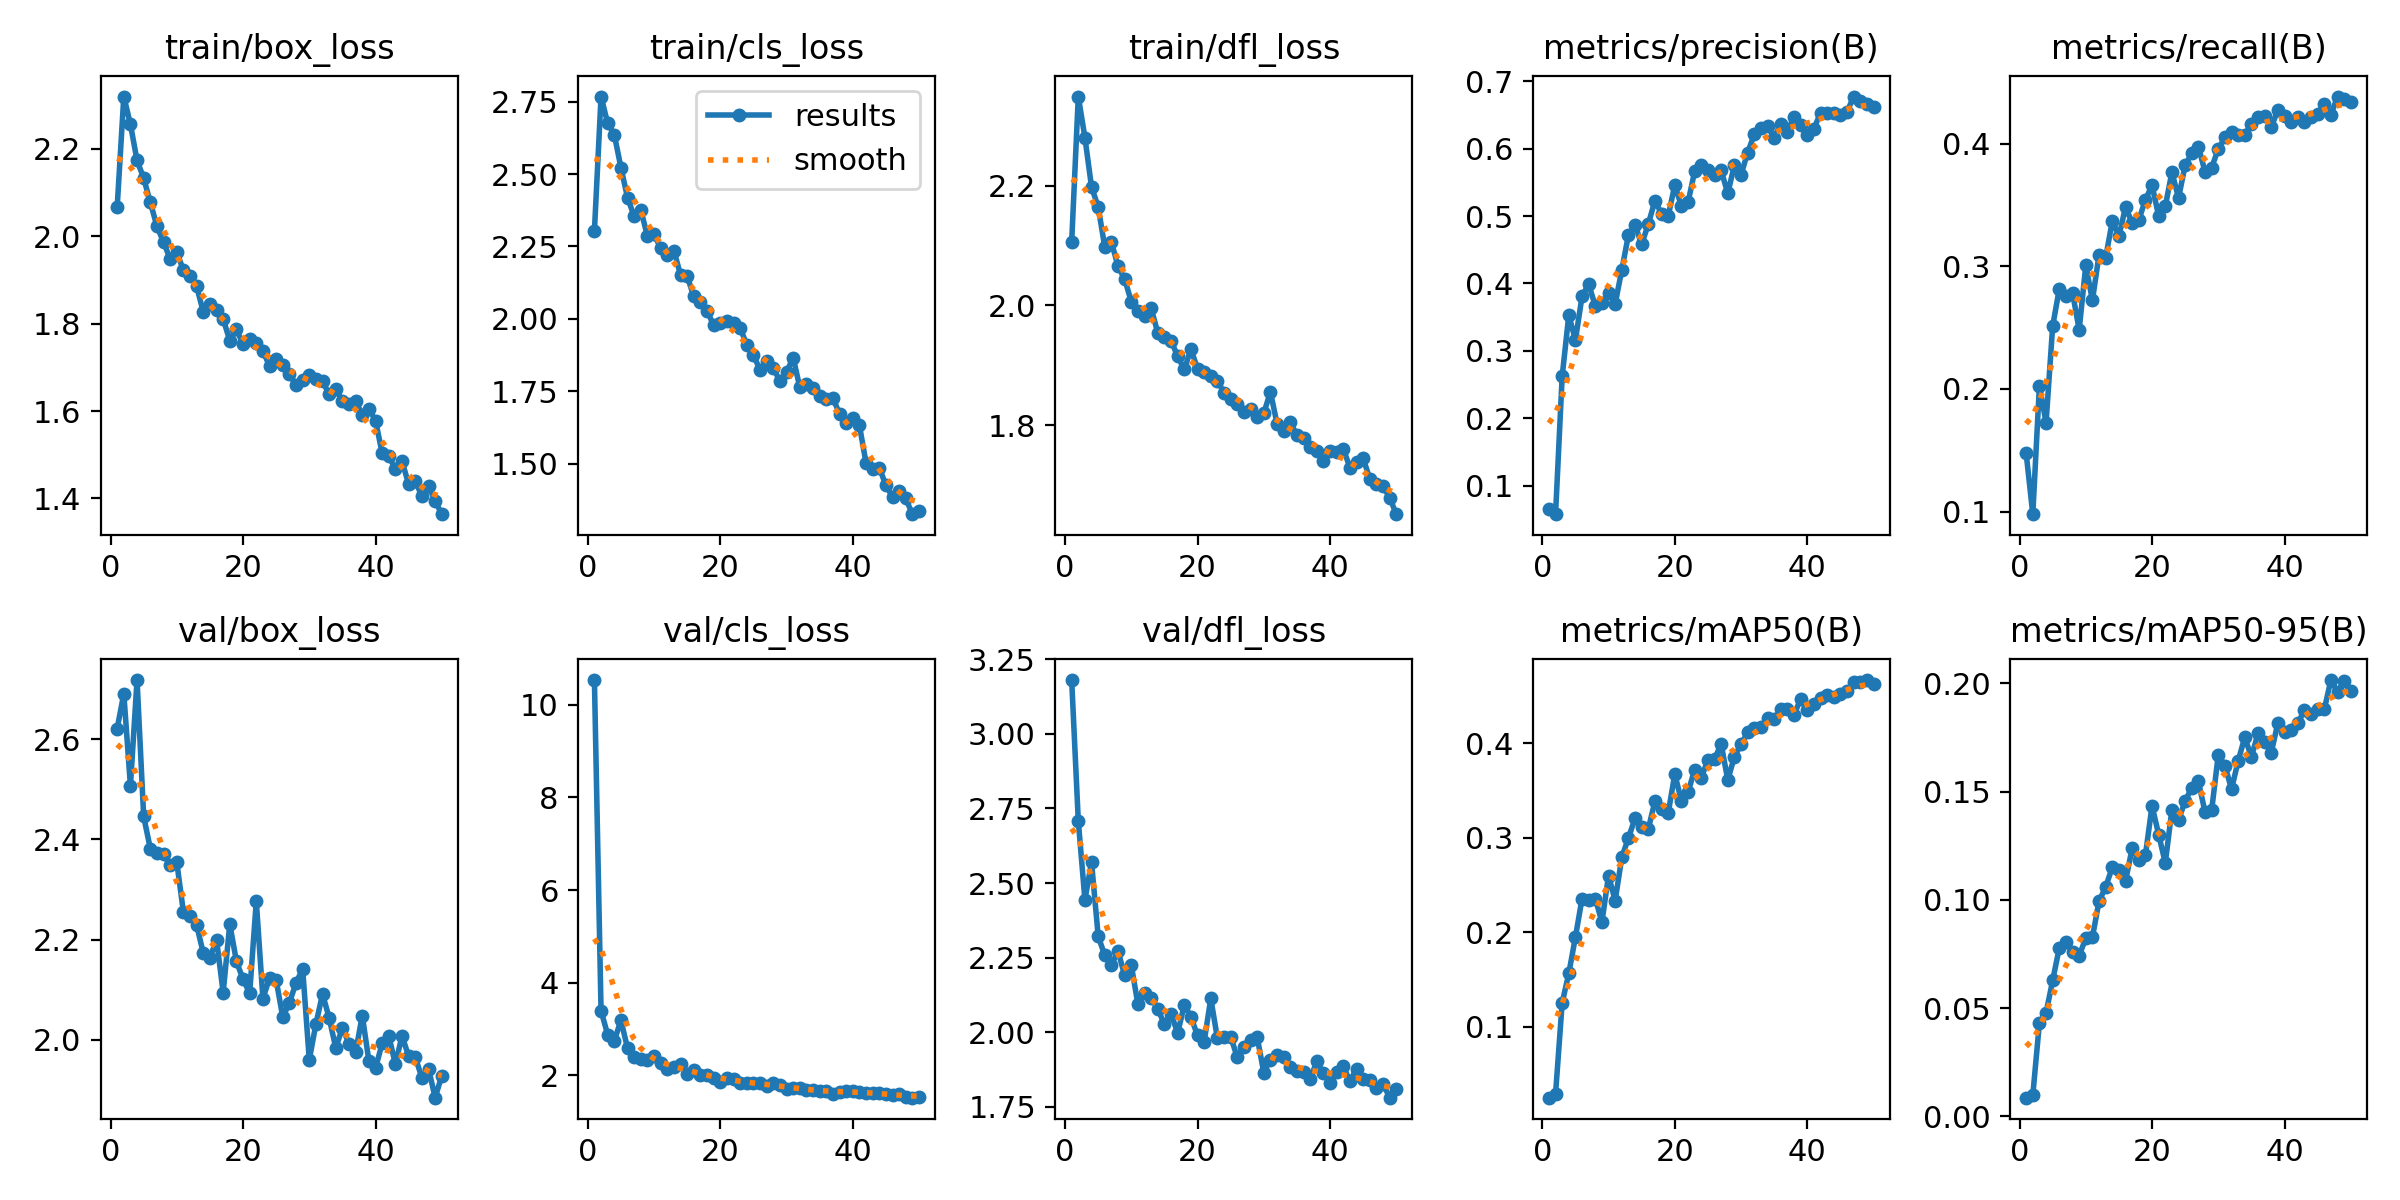

In [ ]:
from IPython.display import Image

Image(filename="runs/detect/train6/results.png", width=750)


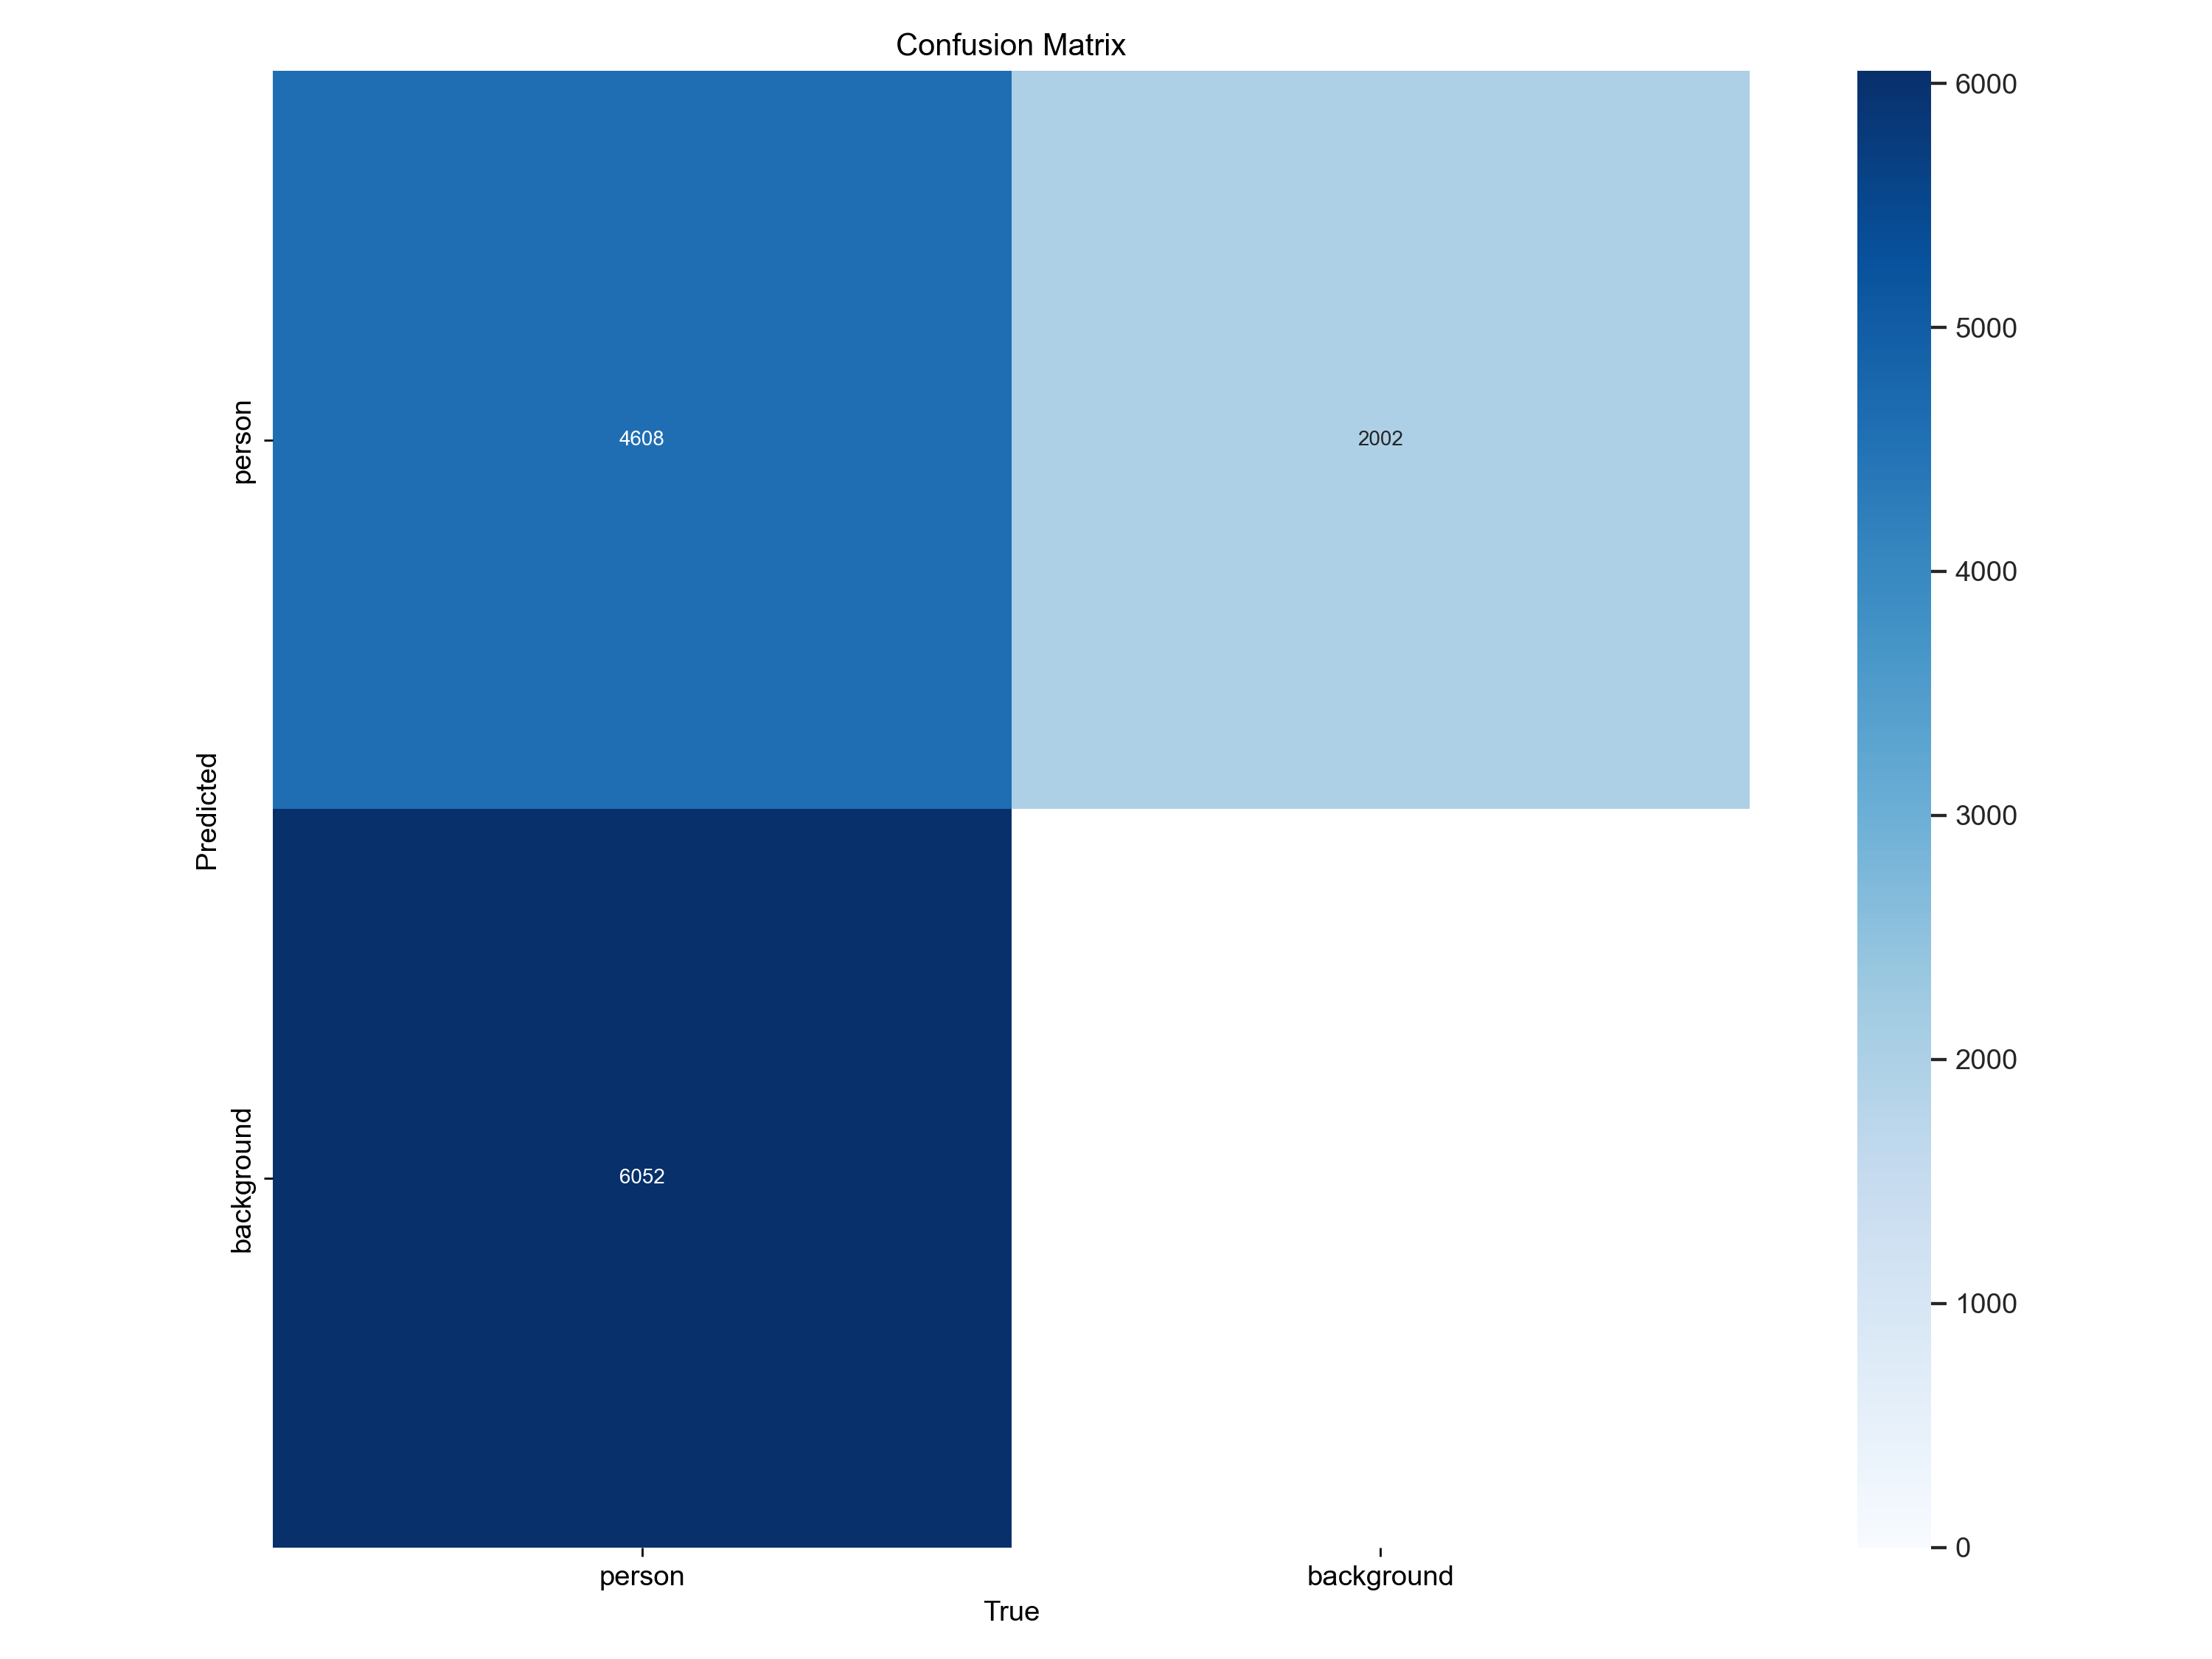

In [ ]:
from IPython.display import Image

Image(filename="runs/detect/train6/confusion_matrix.png", width=700)


In [ ]:
from IPython.display import Image

Image(filename="runs/detect/train6/confusion_matrix.png", width=700)


# train one more 

In [4]:
from ultralytics import YOLO
model = YOLO("yolo11l.pt")

model.train(
    data="D:/image processing/image-processing-assignment-/People Detection.v9i.yolov11/data.yaml",
    epochs=100,        # You can go higher if training time allows
    imgsz=640,
    batch=-1, 
    patience=10,      # Stop early if no improvement
    augment=True,
    device = "0",
    cfg="augmentations.yaml"  # ← custom augmentations    # Enable augmentation
)

New https://pypi.org/project/ultralytics/8.3.127 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.122  Python-3.12.10 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: task=detect, mode=train, model=yolo11l.pt, data=D:/image processing/image-processing-assignment-/People Detection.v9i.yolov11/data.yaml, epochs=100, time=None, patience=10, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes

train: Scanning D:\image processing\image-processing-assignment-\People Detection.v9i.yolov11\test\labels.cache... 760 images, 22 backgrounds, 0 corrupt: 100%|██████████| 760/760 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU) 6.00G total, 0.25G reserved, 0.23G allocated, 5.52G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


    25311251       87.27         1.927         67.79         376.9        (1, 3, 640, 640)                    list
    25311251       174.5         2.730         68.59         133.4        (2, 3, 640, 640)                    list
    25311251       349.1         4.146         67.96         157.1        (4, 3, 640, 640)                    list
    25311251       698.2         7.004         139.4         234.5        (8, 3, 640, 640)                    list
    25311251        1396        12.224          1784          4413       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 2 for CUDA:0 3.17G/6.00G (53%) 
train: Fast image access  (ping: 0.10.0 ms, read: 68.126.8 MB/s, size: 27.3 KB)


train: Scanning D:\image processing\image-processing-assignment-\People Detection.v9i.yolov11\test\labels.cache... 760 images, 22 backgrounds, 0 corrupt: 100%|██████████| 760/760 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.50.2 ms, read: 39.218.5 MB/s, size: 38.8 KB)


val: Scanning D:\image processing\image-processing-assignment-\People Detection.v9i.yolov11\valid\labels.cache... 1431 images, 61 backgrounds, 0 corrupt: 100%|██████████| 1431/1431 [00:00<?, ?it/s]

val: D:\image processing\image-processing-assignment-\People Detection.v9i.yolov11\valid\images\GX010023_frame_00025_right_jpg.rf.3255febc597d78d5d6e4bde455ba7b2a.jpg: 23 duplicate labels removed
WARNING Box and segment counts should be equal, but got len(segments) = 61, len(boxes) = 10660. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to d:\image processing\image-processing-assignment-\runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to d:\image processing\image-processing-assignment-\runs\detect\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.83G      2.067      2.303      2.106         10        640: 100%|██████████| 380/380 [00:47<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.84it/s]


                   all       1431      10660     0.0649      0.147     0.0252    0.00858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.36G      2.317      2.771      2.338         22        640: 100%|██████████| 380/380 [00:43<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.76it/s]


                   all       1431      10660      0.172      0.189     0.0747     0.0224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.46G      2.235      2.627      2.247         12        640: 100%|██████████| 380/380 [00:43<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.65it/s]


                   all       1431      10660      0.238      0.226      0.153     0.0498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.55G      2.188       2.66      2.223         31        640: 100%|██████████| 380/380 [00:44<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.73it/s]


                   all       1431      10660      0.172        0.2     0.0836     0.0279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.55G      2.156       2.59      2.184          8        640: 100%|██████████| 380/380 [00:42<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.71it/s]


                   all       1431      10660      0.197      0.208      0.095     0.0277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.55G      2.128      2.483      2.137         30        640: 100%|██████████| 380/380 [00:42<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.87it/s]


                   all       1431      10660      0.373      0.237      0.219     0.0739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.55G      2.024      2.438      2.108         11        640: 100%|██████████| 380/380 [00:42<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.86it/s]


                   all       1431      10660      0.313      0.237      0.214      0.076

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.55G      2.041       2.44      2.121          4        640: 100%|██████████| 380/380 [00:42<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.97it/s]


                   all       1431      10660      0.325      0.213      0.193     0.0647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.55G      1.977      2.362      2.071         13        640: 100%|██████████| 380/380 [00:42<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.90it/s]


                   all       1431      10660       0.36      0.249      0.216     0.0785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.55G      1.961      2.327      2.012          9        640: 100%|██████████| 380/380 [00:42<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.52it/s]


                   all       1431      10660      0.375      0.281      0.243     0.0809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.55G      1.928      2.261      2.019         10        640: 100%|██████████| 380/380 [00:43<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.89it/s]


                   all       1431      10660       0.39      0.288      0.248     0.0889

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.55G      1.886      2.234      1.974          9        640: 100%|██████████| 380/380 [00:42<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.97it/s]


                   all       1431      10660      0.429      0.298      0.266     0.0966

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.55G      1.915      2.257      1.994         49        640: 100%|██████████| 380/380 [00:42<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.76it/s]


                   all       1431      10660       0.43      0.298       0.28      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.55G      1.837      2.194      1.966          6        640: 100%|██████████| 380/380 [00:42<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.92it/s]


                   all       1431      10660      0.487      0.323      0.316      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.55G       1.84      2.165       1.96          5        640: 100%|██████████| 380/380 [00:41<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.01it/s]


                   all       1431      10660      0.454      0.305       0.29      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.55G      1.862      2.161       1.98          7        640: 100%|██████████| 380/380 [00:42<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.95it/s]


                   all       1431      10660      0.477      0.311      0.293      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.55G      1.828      2.128       1.94          8        640: 100%|██████████| 380/380 [00:42<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.95it/s]


                   all       1431      10660      0.463       0.32      0.303      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.55G      1.795      2.118      1.922         10        640: 100%|██████████| 380/380 [00:42<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.01it/s]


                   all       1431      10660      0.459      0.309      0.302      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.55G      1.797      2.068      1.953         11        640: 100%|██████████| 380/380 [00:42<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.97it/s]


                   all       1431      10660      0.528       0.35      0.332      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.55G      1.785      2.026      1.927          7        640: 100%|██████████| 380/380 [00:42<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.03it/s]


                   all       1431      10660      0.486      0.335      0.317       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.55G      1.786      2.031       1.92         17        640: 100%|██████████| 380/380 [00:42<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.36it/s]


                   all       1431      10660      0.534      0.339       0.34      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.55G      1.784      2.031      1.906          6        640: 100%|██████████| 380/380 [00:42<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.95it/s]


                   all       1431      10660      0.501      0.339      0.332      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.55G      1.773          2      1.901         49        640: 100%|██████████| 380/380 [00:42<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.98it/s]


                   all       1431      10660      0.506      0.367      0.329      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.55G      1.757      1.967      1.893         25        640: 100%|██████████| 380/380 [00:42<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.01it/s]


                   all       1431      10660      0.532      0.331       0.33       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.55G      1.755      1.961      1.882          3        640: 100%|██████████| 380/380 [00:42<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.76it/s]


                   all       1431      10660       0.56      0.374      0.366       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.55G      1.749      1.919      1.863         11        640: 100%|██████████| 380/380 [00:42<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.97it/s]


                   all       1431      10660      0.527      0.351      0.355      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.55G      1.754      1.981      1.868         13        640: 100%|██████████| 380/380 [00:42<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.99it/s]


                   all       1431      10660      0.543      0.378      0.369      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.55G      1.698      1.898      1.848         17        640: 100%|██████████| 380/380 [00:42<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.00it/s]


                   all       1431      10660      0.499      0.361      0.332      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.55G      1.738      1.879      1.851          9        640: 100%|██████████| 380/380 [00:42<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:20<00:00, 17.06it/s]


                   all       1431      10660      0.535      0.345      0.347      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.55G      1.726      1.897      1.852         22        640: 100%|██████████| 380/380 [00:42<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.00it/s]


                   all       1431      10660      0.556      0.386      0.391      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.55G      1.708      1.934      1.882         13        640: 100%|██████████| 380/380 [00:42<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.98it/s]


                   all       1431      10660      0.583      0.392      0.392      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.55G      1.711      1.865      1.836         11        640: 100%|██████████| 380/380 [00:41<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.03it/s]


                   all       1431      10660      0.563      0.373      0.372      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.55G      1.666      1.873       1.84         44        640: 100%|██████████| 380/380 [00:42<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.66it/s]


                   all       1431      10660      0.587      0.391      0.387      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.55G      1.672      1.845       1.83         25        640: 100%|██████████| 380/380 [00:42<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.97it/s]


                   all       1431      10660      0.597      0.387      0.397      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.55G      1.667       1.83      1.842          5        640: 100%|██████████| 380/380 [00:42<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.95it/s]


                   all       1431      10660      0.577       0.39      0.397      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.55G      1.675      1.835      1.841         10        640: 100%|██████████| 380/380 [00:42<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.88it/s]


                   all       1431      10660      0.615      0.406      0.414      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.55G      1.672      1.856      1.818         15        640: 100%|██████████| 380/380 [00:42<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.02it/s]


                   all       1431      10660      0.585      0.392      0.402      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.55G      1.663      1.795      1.824         72        640: 100%|██████████| 380/380 [00:42<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.99it/s]


                   all       1431      10660      0.599      0.381       0.39      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.55G      1.651      1.771      1.787         59        640: 100%|██████████| 380/380 [00:42<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.86it/s]


                   all       1431      10660      0.585      0.399      0.406      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.55G      1.638      1.757        1.8          3        640: 100%|██████████| 380/380 [00:42<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.99it/s]


                   all       1431      10660      0.602      0.405      0.415      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.55G      1.633      1.737      1.783         20        640: 100%|██████████| 380/380 [00:42<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.89it/s]


                   all       1431      10660      0.622      0.412      0.422      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.55G      1.655      1.752      1.784         78        640: 100%|██████████| 380/380 [00:42<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.93it/s]


                   all       1431      10660      0.613      0.389      0.402      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.55G      1.648       1.75      1.799         16        640: 100%|██████████| 380/380 [00:42<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.00it/s]


                   all       1431      10660      0.608      0.394      0.411      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.55G      1.634      1.733       1.78         13        640: 100%|██████████| 380/380 [00:41<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.01it/s]


                   all       1431      10660       0.63      0.403      0.411      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.55G      1.629      1.731      1.782         50        640: 100%|██████████| 380/380 [00:42<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.03it/s]


                   all       1431      10660      0.622      0.419      0.428       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.55G      1.596      1.698      1.753         13        640: 100%|██████████| 380/380 [00:42<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.97it/s]


                   all       1431      10660      0.636       0.42      0.433      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.55G      1.574      1.655      1.735         56        640: 100%|██████████| 380/380 [00:42<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.99it/s]


                   all       1431      10660      0.657      0.418      0.448      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.55G      1.596      1.722      1.777          6        640: 100%|██████████| 380/380 [00:42<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.99it/s]


                   all       1431      10660      0.613      0.407      0.429       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.55G      1.611      1.699      1.764         11        640: 100%|██████████| 380/380 [00:42<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.04it/s]

                   all       1431      10660      0.648      0.418      0.446      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.55G      1.628      1.724      1.785         18        640: 100%|██████████| 380/380 [00:42<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.01it/s]

                   all       1431      10660      0.632      0.409      0.428      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.55G      1.611      1.647      1.762          5        640: 100%|██████████| 380/380 [00:42<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.00it/s]


                   all       1431      10660      0.642      0.422      0.438      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.55G      1.576      1.674      1.761         12        640: 100%|██████████| 380/380 [00:42<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.00it/s]


                   all       1431      10660      0.625      0.414      0.431      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.55G      1.579      1.662      1.742         37        640: 100%|██████████| 380/380 [00:42<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.01it/s]


                   all       1431      10660      0.631      0.415      0.434      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.55G      1.575      1.625      1.731          5        640: 100%|██████████| 380/380 [00:42<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.99it/s]


                   all       1431      10660      0.651      0.406      0.435      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.55G      1.556      1.643      1.738          4        640: 100%|██████████| 380/380 [00:42<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.00it/s]

                   all       1431      10660      0.641       0.43      0.449      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.55G      1.564      1.681      1.756          4        640: 100%|██████████| 380/380 [00:42<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.91it/s]

                   all       1431      10660      0.656      0.422      0.445      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.55G      1.565      1.666      1.735         12        640: 100%|██████████| 380/380 [00:42<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.03it/s]


                   all       1431      10660      0.686      0.424      0.458      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.55G      1.569      1.611      1.717         12        640: 100%|██████████| 380/380 [00:42<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.04it/s]

                   all       1431      10660      0.639       0.42      0.447      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.55G      1.526       1.58      1.686         11        640: 100%|██████████| 380/380 [00:42<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.98it/s]


                   all       1431      10660      0.639       0.42      0.443      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.55G       1.56      1.553      1.723         29        640: 100%|██████████| 380/380 [00:43<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.62it/s]


                   all       1431      10660      0.662      0.416      0.449      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.55G      1.527      1.598      1.715          7        640: 100%|██████████| 380/380 [00:42<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.03it/s]


                   all       1431      10660      0.667      0.432      0.457        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.55G      1.561      1.544      1.721         10        640: 100%|██████████| 380/380 [00:42<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.00it/s]


                   all       1431      10660      0.633      0.421      0.446      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.55G      1.512      1.551      1.697         18        640: 100%|██████████| 380/380 [00:42<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.03it/s]


                   all       1431      10660      0.651      0.431      0.457      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.55G      1.559      1.526      1.708         12        640: 100%|██████████| 380/380 [00:42<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:20<00:00, 17.06it/s]

                   all       1431      10660       0.67      0.425      0.449      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.55G       1.51      1.572      1.713          5        640: 100%|██████████| 380/380 [00:42<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.03it/s]


                   all       1431      10660      0.678      0.427      0.459      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.55G      1.488      1.553      1.691          6        640: 100%|██████████| 380/380 [00:42<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:20<00:00, 17.06it/s]


                   all       1431      10660      0.672      0.438      0.466      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.55G      1.486      1.523       1.68          6        640: 100%|██████████| 380/380 [00:42<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.01it/s]

                   all       1431      10660      0.691      0.431      0.462      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.55G      1.507      1.504      1.694          7        640: 100%|██████████| 380/380 [00:42<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.03it/s]

                   all       1431      10660      0.672      0.429      0.462      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.55G      1.492      1.508      1.689         14        640: 100%|██████████| 380/380 [00:42<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:20<00:00, 17.06it/s]


                   all       1431      10660      0.662      0.435      0.466        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.55G        1.5      1.493      1.676         13        640: 100%|██████████| 380/380 [00:42<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.03it/s]

                   all       1431      10660      0.665      0.441      0.469      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.55G      1.457       1.48      1.673          8        640: 100%|██████████| 380/380 [00:42<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.03it/s]

                   all       1431      10660      0.671      0.443      0.473      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.55G      1.476      1.491      1.662         18        640: 100%|██████████| 380/380 [00:42<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.03it/s]

                   all       1431      10660      0.671      0.433      0.467      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.55G      1.483      1.508      1.683         16        640: 100%|██████████| 380/380 [00:42<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.00it/s]


                   all       1431      10660      0.662       0.45      0.475      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.55G      1.498      1.473      1.674         29        640: 100%|██████████| 380/380 [00:42<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.02it/s]


                   all       1431      10660      0.691      0.442      0.475      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.55G      1.459      1.459      1.661          5        640: 100%|██████████| 380/380 [00:42<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.03it/s]

                   all       1431      10660      0.675      0.434      0.473      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.55G       1.49      1.481       1.69          6        640: 100%|██████████| 380/380 [00:42<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.04it/s]

                   all       1431      10660      0.674      0.442       0.47      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.55G      1.474      1.477      1.667          8        640: 100%|██████████| 380/380 [00:42<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:20<00:00, 17.09it/s]


                   all       1431      10660      0.681       0.45       0.48      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.55G      1.463      1.464      1.673         44        640: 100%|██████████| 380/380 [00:42<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:20<00:00, 17.08it/s]


                   all       1431      10660      0.696       0.45      0.488      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.55G      1.486      1.444      1.655          5        640: 100%|██████████| 380/380 [00:42<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.01it/s]

                   all       1431      10660      0.678      0.446      0.476      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.55G       1.41      1.373      1.632          7        640: 100%|██████████| 380/380 [00:42<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.99it/s]


                   all       1431      10660      0.688      0.455      0.492      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.55G      1.448       1.44      1.656         44        640: 100%|██████████| 380/380 [00:42<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:20<00:00, 17.07it/s]

                   all       1431      10660      0.686      0.438      0.473      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.55G      1.436      1.413      1.637          8        640: 100%|██████████| 380/380 [00:42<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.05it/s]

                   all       1431      10660      0.691      0.453      0.489      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.55G      1.437      1.432      1.629          3        640: 100%|██████████| 380/380 [00:42<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.95it/s]

                   all       1431      10660      0.692      0.452      0.487      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.55G      1.404      1.365      1.618         10        640: 100%|██████████| 380/380 [00:42<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.00it/s]


                   all       1431      10660      0.689      0.463      0.496      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.55G      1.434      1.399      1.642         13        640: 100%|██████████| 380/380 [00:42<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.05it/s]


                   all       1431      10660      0.696      0.462      0.495      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.55G      1.417      1.356      1.615         14        640: 100%|██████████| 380/380 [00:42<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.97it/s]

                   all       1431      10660      0.679      0.466      0.491      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.55G      1.435      1.359      1.617         15        640: 100%|██████████| 380/380 [00:42<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:20<00:00, 17.06it/s]

                   all       1431      10660      0.678      0.471      0.499      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.55G      1.425      1.382      1.632          9        640: 100%|██████████| 380/380 [00:42<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 17.04it/s]

                   all       1431      10660      0.701      0.457      0.497      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.55G      1.396      1.338      1.619          6        640: 100%|██████████| 380/380 [00:42<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:20<00:00, 17.05it/s]


                   all       1431      10660      0.698      0.464      0.501      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.55G      1.409      1.353      1.619         11        640: 100%|██████████| 380/380 [00:42<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:20<00:00, 17.08it/s]

                   all       1431      10660       0.69       0.46      0.494      0.208


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.55G      1.284      1.216      1.575          2        640: 100%|██████████| 380/380 [00:42<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:20<00:00, 17.11it/s]

                   all       1431      10660      0.683      0.455      0.496      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.55G      1.304      1.195      1.604         42        640: 100%|██████████| 380/380 [00:44<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.71it/s]

                   all       1431      10660      0.697       0.45      0.492       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.55G      1.258      1.188      1.562          3        640: 100%|██████████| 380/380 [00:43<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.79it/s]

                   all       1431      10660      0.692      0.454      0.495      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.55G      1.249      1.098      1.555         11        640: 100%|██████████| 380/380 [00:43<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.76it/s]

                   all       1431      10660      0.707       0.45      0.496      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.55G      1.256      1.119      1.562          2        640: 100%|██████████| 380/380 [00:43<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.73it/s]

                   all       1431      10660      0.684      0.449      0.493      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.55G      1.243      1.072      1.542          2        640: 100%|██████████| 380/380 [00:43<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.77it/s]

                   all       1431      10660      0.697      0.449      0.497       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.55G      1.218      1.126      1.544          5        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.70it/s]

                   all       1431      10660      0.693      0.458      0.506      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.55G      1.244      1.075      1.562          2        640: 100%|██████████| 380/380 [00:44<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.75it/s]

                   all       1431      10660        0.7      0.453      0.504      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.55G      1.226      1.046      1.533          3        640: 100%|██████████| 380/380 [00:43<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.75it/s]

                   all       1431      10660      0.708      0.454      0.507       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.55G      1.227      1.046      1.537         16        640: 100%|██████████| 380/380 [00:44<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.14it/s]

                   all       1431      10660      0.693      0.458      0.504      0.229



100 epochs completed in 1.810 hours.
Optimizer stripped from d:\image processing\image-processing-assignment-\runs\detect\train\weights\last.pt, 51.2MB
Optimizer stripped from d:\image processing\image-processing-assignment-\runs\detect\train\weights\best.pt, 51.2MB

Validating d:\image processing\image-processing-assignment-\runs\detect\train\weights\best.pt...
Ultralytics 8.3.122  Python-3.12.10 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
YOLO11l summary (fused): 190 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:39<00:00,  9.16it/s]


                   all       1431      10660      0.694      0.454      0.498      0.227
Speed: 0.3ms preprocess, 21.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to d:\image processing\image-processing-assignment-\runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000016BD3C27050>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

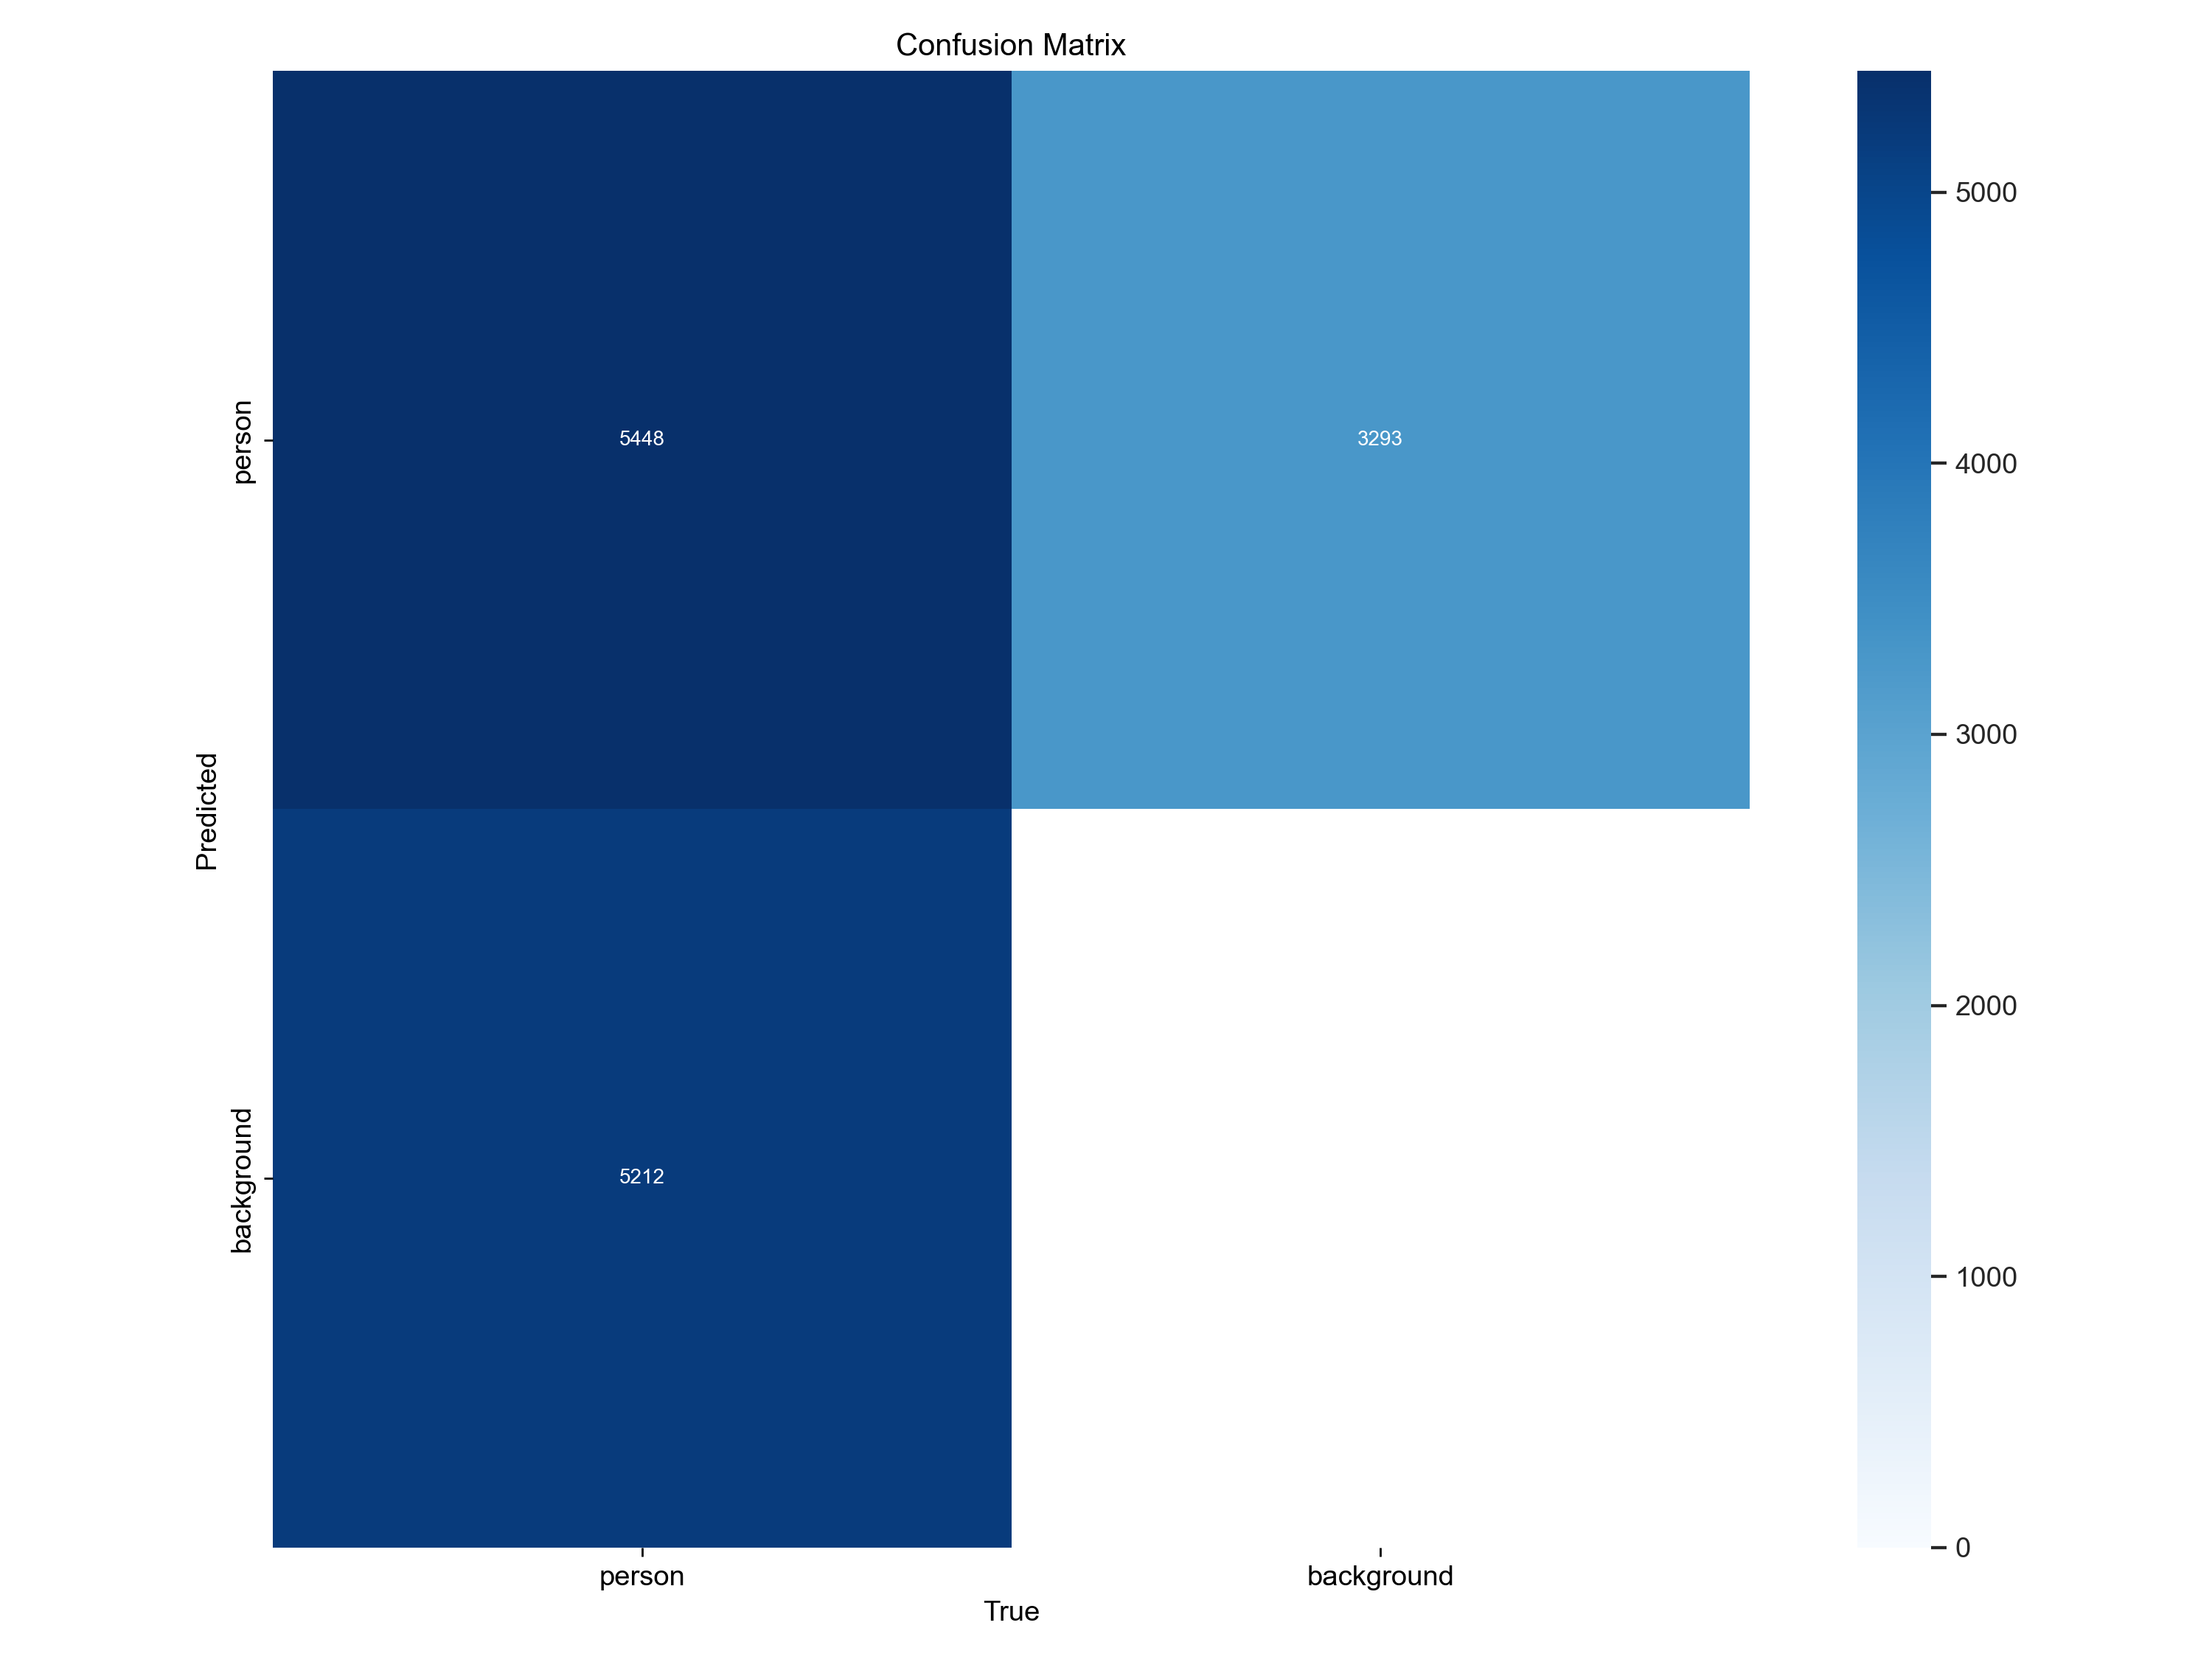

In [5]:
from IPython.display import Image

Image(filename="runs/detect/train/confusion_matrix.png", width=700)

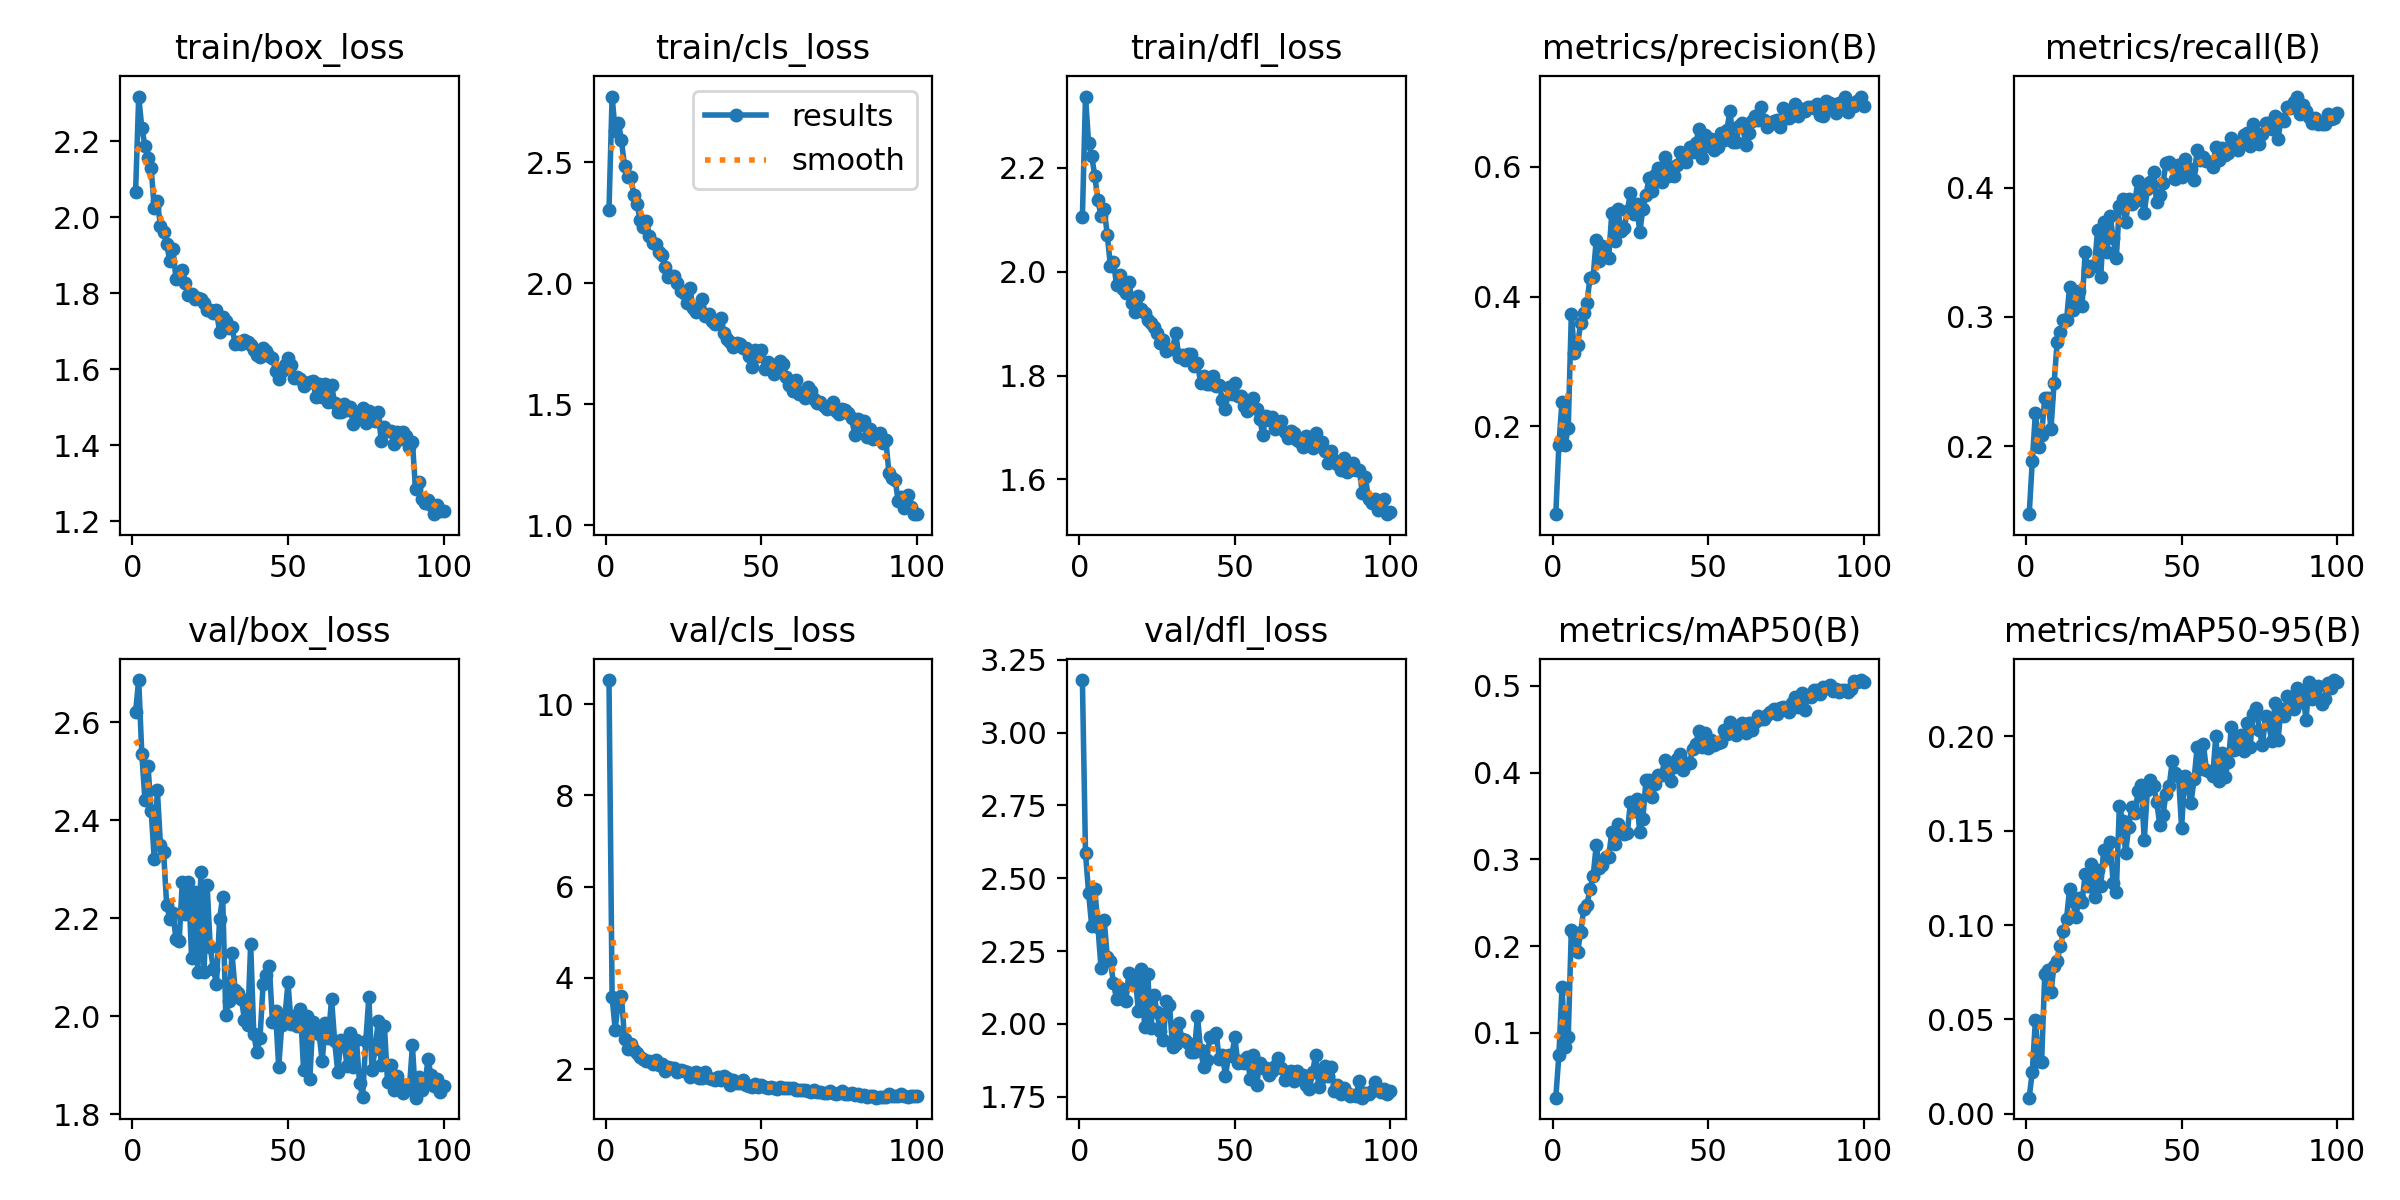

In [6]:
from IPython.display import Image

Image(filename="runs/detect/train/results.png", width=700)

epochs= 500

In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11l.pt")

model.train(
    data="D:/image processing/image-processing-assignment-/People Detection.v9i.yolov11/data.yaml",
    epochs=500,        # You can go higher if training time allows
    imgsz=640,
    batch=-1, 
    patience=60,      # Stop early if no improvement
    augment=True,
    device = "0",
    cfg="augmentations.yaml"  # ← custom augmentations    # Enable augmentation
)

New https://pypi.org/project/ultralytics/8.3.131 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.122  Python-3.12.10 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: task=detect, mode=train, model=yolo11l.pt, data=D:/image processing/image-processing-assignment-/People Detection.v9i.yolov11/data.yaml, epochs=500, time=None, patience=60, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classe

train: Scanning D:\image processing\image-processing-assignment-\People Detection.v9i.yolov11\test\labels.cache... 760 images, 22 backgrounds, 0 corrupt: 100%|██████████| 760/760 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU) 6.00G total, 0.99G reserved, 0.75G allocated, 4.25G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


    25311251       87.27         2.022         46.61         76.18        (1, 3, 640, 640)                    list
    25311251       174.5         2.898         56.54         77.16        (2, 3, 640, 640)                    list
    25311251       349.1         4.228         91.42         109.4        (4, 3, 640, 640)                    list
    25311251       698.2         7.057         248.8          1382        (8, 3, 640, 640)                    list
    25311251        1396        12.294          4820          4915       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 2 for CUDA:0 4.55G/6.00G (76%) 
train: Fast image access  (ping: 0.10.0 ms, read: 64.432.1 MB/s, size: 27.3 KB)


train: Scanning D:\image processing\image-processing-assignment-\People Detection.v9i.yolov11\test\labels.cache... 760 images, 22 backgrounds, 0 corrupt: 100%|██████████| 760/760 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 74.827.1 MB/s, size: 38.8 KB)


val: Scanning D:\image processing\image-processing-assignment-\People Detection.v9i.yolov11\valid\labels.cache... 1431 images, 61 backgrounds, 0 corrupt: 100%|██████████| 1431/1431 [00:00<?, ?it/s]

val: D:\image processing\image-processing-assignment-\People Detection.v9i.yolov11\valid\images\GX010023_frame_00025_right_jpg.rf.3255febc597d78d5d6e4bde455ba7b2a.jpg: 23 duplicate labels removed
WARNING Box and segment counts should be equal, but got len(segments) = 61, len(boxes) = 10660. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to d:\image processing\image-processing-assignment-\runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to d:\image processing\image-processing-assignment-\runs\detect\train2
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      1.83G      2.067      2.303      2.106         10        640: 100%|██████████| 380/380 [00:49<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.15it/s]


                   all       1431      10660     0.0649      0.147     0.0252    0.00858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      2.36G      2.331      2.808      2.351         22        640: 100%|██████████| 380/380 [00:52<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.65it/s]


                   all       1431      10660     0.0661      0.109     0.0199    0.00628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      2.36G      2.313      2.834      2.348         12        640: 100%|██████████| 380/380 [00:44<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.74it/s]


                   all       1431      10660      0.134      0.131     0.0539     0.0175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      2.46G      2.302       2.84       2.32         31        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.82it/s]


                   all       1431      10660     0.0406     0.0814     0.0189    0.00587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      2.46G      2.266        2.8      2.276          8        640: 100%|██████████| 380/380 [00:45<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:23<00:00, 15.20it/s]


                   all       1431      10660      0.159      0.165     0.0645     0.0204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      2.46G      2.173      2.652      2.173         30        640: 100%|██████████| 380/380 [00:45<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.57it/s]


                   all       1431      10660      0.273        0.2      0.154     0.0503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      2.56G       2.08       2.55      2.154         11        640: 100%|██████████| 380/380 [00:44<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.67it/s]


                   all       1431      10660      0.294       0.25      0.173     0.0597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      2.56G      2.064       2.57      2.127          4        640: 100%|██████████| 380/380 [00:44<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:23<00:00, 15.36it/s]


                   all       1431      10660      0.326      0.217      0.175      0.054

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      2.56G      2.022      2.477      2.103         13        640: 100%|██████████| 380/380 [00:44<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.06it/s]


                   all       1431      10660      0.364      0.199      0.187     0.0639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      2.56G      2.018      2.487      2.058          9        640: 100%|██████████| 380/380 [00:44<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.99it/s]


                   all       1431      10660      0.324      0.245      0.199     0.0725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      2.56G      1.966      2.399      2.046         10        640: 100%|██████████| 380/380 [00:44<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.03it/s]


                   all       1431      10660      0.336      0.254      0.218     0.0775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      2.56G      1.941      2.343      2.022          9        640: 100%|██████████| 380/380 [00:44<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.93it/s]


                   all       1431      10660      0.394      0.265      0.247     0.0923

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      2.56G      1.937      2.321       2.03         49        640: 100%|██████████| 380/380 [00:44<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.06it/s]


                   all       1431      10660      0.342      0.289      0.242     0.0871

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      2.56G      1.895      2.247      1.997          6        640: 100%|██████████| 380/380 [00:44<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.96it/s]


                   all       1431      10660      0.466      0.301      0.279      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      2.56G      1.887      2.264      1.967          5        640: 100%|██████████| 380/380 [00:44<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.04it/s]


                   all       1431      10660       0.38      0.288      0.249     0.0895

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      2.56G      1.891      2.205      1.984          7        640: 100%|██████████| 380/380 [00:43<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.05it/s]


                   all       1431      10660      0.401      0.309      0.273     0.0916

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      2.56G      1.866      2.208      1.959          8        640: 100%|██████████| 380/380 [00:43<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.02it/s]


                   all       1431      10660      0.459      0.299      0.288      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      2.56G      1.829      2.195      1.931         10        640: 100%|██████████| 380/380 [00:44<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.04it/s]


                   all       1431      10660      0.393      0.279      0.257     0.0922

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      2.56G      1.857      2.124      1.968         11        640: 100%|██████████| 380/380 [00:43<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.05it/s]


                   all       1431      10660      0.424      0.305      0.263      0.098

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      2.56G       1.83      2.138      1.965          7        640: 100%|██████████| 380/380 [00:44<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.12it/s]


                   all       1431      10660      0.429      0.283      0.271      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      2.56G      1.838       2.12      1.942         17        640: 100%|██████████| 380/380 [00:44<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.94it/s]


                   all       1431      10660       0.43        0.3      0.286      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      2.56G      1.832      2.127      1.941          6        640: 100%|██████████| 380/380 [00:44<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.17it/s]


                   all       1431      10660      0.466      0.308      0.302      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      2.56G      1.793      2.067      1.907         49        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.00it/s]


                   all       1431      10660      0.503       0.32      0.303      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      2.56G      1.778      2.057      1.914         25        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.01it/s]


                   all       1431      10660      0.499      0.327       0.32      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      2.56G        1.8       2.07      1.907          3        640: 100%|██████████| 380/380 [00:43<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.05it/s]


                   all       1431      10660       0.52      0.344      0.341      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      2.56G      1.802      2.007      1.906         11        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.62it/s]


                   all       1431      10660      0.465      0.324      0.311      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      2.56G      1.782      2.098      1.904         13        640: 100%|██████████| 380/380 [00:44<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.94it/s]


                   all       1431      10660      0.523      0.343      0.336      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      2.56G      1.734      2.041      1.879         17        640: 100%|██████████| 380/380 [00:44<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.99it/s]


                   all       1431      10660       0.46      0.317      0.288     0.0983

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      2.56G      1.777      1.977      1.894          9        640: 100%|██████████| 380/380 [00:44<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.04it/s]


                   all       1431      10660      0.496      0.345      0.332      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      2.56G      1.773      1.992      1.889         22        640: 100%|██████████| 380/380 [00:44<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.05it/s]


                   all       1431      10660      0.544      0.341      0.358      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      2.56G      1.743      2.026      1.898         13        640: 100%|██████████| 380/380 [00:44<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.98it/s]


                   all       1431      10660      0.542      0.352      0.354      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      2.56G      1.758      1.931      1.854         11        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.03it/s]


                   all       1431      10660      0.519      0.339      0.339      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      2.56G      1.748      1.987      1.879         44        640: 100%|██████████| 380/380 [00:44<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.93it/s]


                   all       1431      10660       0.53      0.362      0.354      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      2.56G      1.718      1.971       1.86         25        640: 100%|██████████| 380/380 [00:44<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.16it/s]


                   all       1431      10660      0.521      0.339       0.34      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      2.56G      1.721       1.94      1.875          5        640: 100%|██████████| 380/380 [00:44<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.01it/s]


                   all       1431      10660      0.539      0.356      0.357      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      2.56G      1.742      1.969      1.881         10        640: 100%|██████████| 380/380 [00:44<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.97it/s]


                   all       1431      10660      0.593      0.371      0.377      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      2.56G      1.758      1.975      1.877         15        640: 100%|██████████| 380/380 [00:44<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.03it/s]


                   all       1431      10660      0.558      0.359      0.369      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      2.56G      1.721      1.895      1.861         72        640: 100%|██████████| 380/380 [00:44<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.10it/s]


                   all       1431      10660      0.546      0.364      0.363      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      2.56G      1.726       1.87      1.826         59        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.04it/s]


                   all       1431      10660      0.493      0.361      0.356      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      2.56G      1.703      1.874      1.855          3        640: 100%|██████████| 380/380 [00:44<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.95it/s]


                   all       1431      10660       0.55      0.373      0.373      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      2.56G      1.693      1.854       1.84         20        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.00it/s]


                   all       1431      10660      0.556      0.384      0.377      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      2.56G      1.693      1.881      1.815         78        640: 100%|██████████| 380/380 [00:44<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.03it/s]


                   all       1431      10660      0.532      0.366      0.362      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      2.56G      1.728      1.875      1.855         16        640: 100%|██████████| 380/380 [00:44<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.02it/s]


                   all       1431      10660      0.535       0.36      0.367      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      2.56G       1.69      1.843      1.815         13        640: 100%|██████████| 380/380 [00:44<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.98it/s]


                   all       1431      10660      0.598      0.375      0.379      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      2.56G      1.664      1.839      1.813         50        640: 100%|██████████| 380/380 [00:44<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.11it/s]


                   all       1431      10660      0.573      0.391      0.402      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      2.56G      1.672      1.837      1.811         13        640: 100%|██████████| 380/380 [00:44<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.98it/s]


                   all       1431      10660      0.579      0.385       0.39      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      2.56G      1.649      1.814      1.789         56        640: 100%|██████████| 380/380 [00:44<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.04it/s]


                   all       1431      10660      0.591      0.374      0.392      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      2.56G      1.665      1.839      1.833          6        640: 100%|██████████| 380/380 [00:43<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.05it/s]


                   all       1431      10660      0.572      0.389      0.395      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      2.56G       1.68      1.819      1.804         11        640: 100%|██████████| 380/380 [00:44<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.06it/s]


                   all       1431      10660      0.594       0.38      0.397      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      2.56G      1.695      1.858      1.824         18        640: 100%|██████████| 380/380 [00:44<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.01it/s]


                   all       1431      10660      0.572      0.358      0.372      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      2.56G      1.677      1.796      1.809          5        640: 100%|██████████| 380/380 [00:44<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.99it/s]


                   all       1431      10660      0.591      0.392      0.404      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      2.56G      1.632      1.793      1.796         12        640: 100%|██████████| 380/380 [00:44<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.96it/s]


                   all       1431      10660      0.572        0.4      0.406      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      2.56G      1.636      1.787        1.8         37        640: 100%|██████████| 380/380 [00:44<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.02it/s]


                   all       1431      10660      0.586      0.382      0.402      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      2.56G      1.675      1.755        1.8          5        640: 100%|██████████| 380/380 [00:44<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.99it/s]


                   all       1431      10660      0.572      0.378      0.389      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      2.56G      1.641      1.811      1.798          4        640: 100%|██████████| 380/380 [00:44<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.01it/s]


                   all       1431      10660      0.612      0.399      0.413       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      2.56G      1.658      1.826      1.827          4        640: 100%|██████████| 380/380 [00:44<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.01it/s]


                   all       1431      10660      0.591      0.398      0.405      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      2.56G      1.657      1.824      1.805         12        640: 100%|██████████| 380/380 [00:44<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.98it/s]


                   all       1431      10660       0.59       0.41       0.42      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      2.56G      1.654      1.758       1.78         12        640: 100%|██████████| 380/380 [00:44<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.01it/s]


                   all       1431      10660      0.554       0.39      0.402      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      2.56G      1.615      1.756       1.72         11        640: 100%|██████████| 380/380 [00:44<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.00it/s]


                   all       1431      10660       0.58      0.391      0.398      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      2.56G      1.618      1.711      1.758         29        640: 100%|██████████| 380/380 [00:44<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.87it/s]


                   all       1431      10660      0.606        0.4       0.42      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      2.56G      1.607      1.727      1.763          7        640: 100%|██████████| 380/380 [00:44<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.97it/s]


                   all       1431      10660      0.617      0.401      0.419       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      2.56G      1.629      1.745      1.773         10        640: 100%|██████████| 380/380 [00:44<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.09it/s]

                   all       1431      10660      0.583      0.394      0.401      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      2.56G      1.609      1.707      1.753         18        640: 100%|██████████| 380/380 [00:44<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.98it/s]


                   all       1431      10660      0.605      0.402      0.419      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      2.56G      1.659       1.71       1.78         12        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.04it/s]


                   all       1431      10660      0.596      0.405      0.412      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      2.56G      1.612      1.737      1.785          5        640: 100%|██████████| 380/380 [00:44<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.01it/s]


                   all       1431      10660      0.602       0.39      0.411      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      2.56G      1.604       1.75      1.763          6        640: 100%|██████████| 380/380 [00:44<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.08it/s]


                   all       1431      10660      0.632      0.414      0.434      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      2.56G      1.577      1.706      1.735          6        640: 100%|██████████| 380/380 [00:43<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.12it/s]


                   all       1431      10660      0.595      0.411      0.423      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      2.56G      1.603      1.661      1.753          7        640: 100%|██████████| 380/380 [00:44<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.98it/s]


                   all       1431      10660      0.617      0.409      0.424      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      2.56G      1.598      1.674      1.757         14        640: 100%|██████████| 380/380 [00:44<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.01it/s]


                   all       1431      10660      0.615      0.412      0.416      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      2.56G      1.608       1.66      1.753         13        640: 100%|██████████| 380/380 [00:44<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.11it/s]

                   all       1431      10660      0.614      0.404      0.426      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      2.56G      1.584      1.677      1.754          8        640: 100%|██████████| 380/380 [00:44<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.09it/s]

                   all       1431      10660      0.616      0.404      0.427      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      2.56G      1.607      1.723      1.765         18        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.05it/s]


                   all       1431      10660       0.61      0.416      0.428      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500      2.56G      1.612      1.714       1.77         16        640: 100%|██████████| 380/380 [00:44<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.11it/s]

                   all       1431      10660      0.613      0.412      0.432      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      2.56G      1.623      1.658      1.762         29        640: 100%|██████████| 380/380 [00:44<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.07it/s]


                   all       1431      10660       0.65      0.422      0.446      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      2.56G       1.57      1.668      1.737          5        640: 100%|██████████| 380/380 [00:44<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.06it/s]


                   all       1431      10660      0.622      0.413      0.418      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      2.56G      1.598      1.661      1.771          6        640: 100%|██████████| 380/380 [00:43<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.99it/s]


                   all       1431      10660      0.618      0.416      0.432      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      2.56G      1.589      1.674      1.741          8        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.97it/s]


                   all       1431      10660      0.616      0.424      0.436      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      2.56G      1.577      1.668      1.749         44        640: 100%|██████████| 380/380 [00:44<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.98it/s]


                   all       1431      10660      0.629      0.426      0.434      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      2.56G      1.611      1.641      1.738          5        640: 100%|██████████| 380/380 [00:44<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.11it/s]


                   all       1431      10660      0.617      0.408      0.427      0.182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      2.56G      1.543      1.592      1.729          7        640: 100%|██████████| 380/380 [00:43<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.01it/s]


                   all       1431      10660      0.614      0.436      0.443       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      2.56G      1.574      1.616      1.748         44        640: 100%|██████████| 380/380 [00:43<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.07it/s]


                   all       1431      10660       0.64      0.424      0.438      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      2.56G      1.571      1.616       1.73          8        640: 100%|██████████| 380/380 [00:44<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.13it/s]


                   all       1431      10660      0.631      0.427      0.438      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      2.56G      1.551       1.64      1.712          3        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.98it/s]


                   all       1431      10660      0.609      0.417      0.421      0.178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      2.56G      1.542      1.584      1.716         10        640: 100%|██████████| 380/380 [00:43<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.94it/s]


                   all       1431      10660      0.639      0.421      0.444      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      2.56G      1.565      1.624      1.732         13        640: 100%|██████████| 380/380 [00:43<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.07it/s]


                   all       1431      10660       0.63       0.43       0.44      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      2.56G      1.557      1.554      1.711         14        640: 100%|██████████| 380/380 [00:44<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.08it/s]


                   all       1431      10660      0.643      0.439      0.451      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      2.56G      1.568      1.588      1.713         15        640: 100%|██████████| 380/380 [00:44<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.01it/s]


                   all       1431      10660       0.64      0.426      0.439      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      2.56G      1.529      1.619       1.71          9        640: 100%|██████████| 380/380 [00:44<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.03it/s]

                   all       1431      10660      0.652      0.426      0.449      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      2.56G       1.54      1.557      1.713          6        640: 100%|██████████| 380/380 [00:43<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.11it/s]


                   all       1431      10660       0.64      0.422      0.447       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      2.56G      1.551      1.591      1.731         11        640: 100%|██████████| 380/380 [00:44<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.06it/s]

                   all       1431      10660      0.646      0.425      0.451      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      2.56G      1.579      1.607      1.715         19        640: 100%|██████████| 380/380 [00:44<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.03it/s]


                   all       1431      10660      0.659       0.42      0.449      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      2.56G      1.552      1.583      1.705         19        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.08it/s]


                   all       1431      10660      0.657      0.429      0.455      0.195

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      2.56G      1.548      1.569      1.715         29        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.06it/s]


                   all       1431      10660      0.656       0.43      0.449      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      2.56G      1.561      1.604      1.707         10        640: 100%|██████████| 380/380 [00:44<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.99it/s]


                   all       1431      10660      0.655      0.428      0.454      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      2.56G      1.548       1.59      1.699         60        640: 100%|██████████| 380/380 [00:44<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.05it/s]

                   all       1431      10660      0.663      0.428      0.457      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      2.56G      1.519      1.546      1.669          8        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.04it/s]


                   all       1431      10660      0.658      0.434      0.462      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      2.56G      1.533      1.544      1.692         14        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.12it/s]


                   all       1431      10660       0.63      0.429      0.448      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      2.56G      1.526      1.562        1.7         14        640: 100%|██████████| 380/380 [00:44<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.01it/s]


                   all       1431      10660       0.65       0.43      0.455      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      2.56G      1.535      1.547      1.691          7        640: 100%|██████████| 380/380 [00:44<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.08it/s]


                   all       1431      10660      0.672      0.424      0.453      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      2.56G      1.525      1.688      1.675          7        640: 100%|██████████| 380/380 [00:44<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.13it/s]


                   all       1431      10660      0.664      0.434      0.451      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      2.56G       1.52      1.571      1.699          9        640: 100%|██████████| 380/380 [00:44<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.03it/s]


                   all       1431      10660      0.625      0.432      0.445      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      2.56G      1.523      1.562      1.696         12        640: 100%|██████████| 380/380 [00:44<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.17it/s]

                   all       1431      10660      0.645      0.433      0.452       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      2.56G      1.547      1.543      1.693         26        640: 100%|██████████| 380/380 [00:44<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.00it/s]

                   all       1431      10660      0.625      0.433      0.444      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      2.56G      1.529       1.57      1.708          9        640: 100%|██████████| 380/380 [00:44<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.08it/s]


                   all       1431      10660      0.663      0.436      0.464      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      2.56G      1.528       1.59      1.695          8        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.02it/s]


                   all       1431      10660       0.66      0.437      0.466      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      2.56G      1.496      1.499      1.673         27        640: 100%|██████████| 380/380 [00:44<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.99it/s]


                   all       1431      10660      0.641      0.437      0.453      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      2.56G      1.506      1.521      1.677         11        640: 100%|██████████| 380/380 [00:44<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.99it/s]


                   all       1431      10660      0.666      0.438      0.461      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      2.56G      1.509      1.496      1.679          7        640: 100%|██████████| 380/380 [00:44<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.12it/s]


                   all       1431      10660      0.666      0.434      0.459      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      2.56G      1.511      1.537      1.693         10        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.03it/s]

                   all       1431      10660      0.665      0.425      0.449      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      2.56G      1.505      1.556      1.688         11        640: 100%|██████████| 380/380 [00:44<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.10it/s]


                   all       1431      10660      0.654       0.45      0.471      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      2.56G      1.497      1.474      1.664         13        640: 100%|██████████| 380/380 [00:44<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.04it/s]

                   all       1431      10660      0.678      0.438       0.47      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      2.56G      1.489      1.467      1.651         50        640: 100%|██████████| 380/380 [00:43<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.01it/s]


                   all       1431      10660       0.66      0.438      0.467      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      2.56G      1.496      1.517      1.686         19        640: 100%|██████████| 380/380 [00:44<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.09it/s]

                   all       1431      10660      0.657      0.444      0.466      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      2.56G      1.496       1.51      1.677         25        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.05it/s]


                   all       1431      10660      0.678      0.434       0.46      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      2.56G      1.516      1.477      1.665          5        640: 100%|██████████| 380/380 [00:44<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.08it/s]

                   all       1431      10660      0.645      0.435      0.464      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      2.56G      1.482      1.497      1.654          6        640: 100%|██████████| 380/380 [00:44<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.05it/s]


                   all       1431      10660      0.681      0.442      0.478      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      2.56G      1.504      1.472      1.666         10        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.06it/s]


                   all       1431      10660       0.66       0.43      0.458      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      2.56G      1.492       1.48      1.655          8        640: 100%|██████████| 380/380 [00:44<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.07it/s]


                   all       1431      10660      0.652      0.434      0.461      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      2.56G      1.479      1.486      1.655         10        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.02it/s]


                   all       1431      10660      0.657      0.426       0.46      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      2.56G      1.443      1.435      1.638          8        640: 100%|██████████| 380/380 [00:44<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.09it/s]


                   all       1431      10660      0.658      0.442      0.472      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      2.56G      1.475      1.449      1.642         14        640: 100%|██████████| 380/380 [00:44<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.02it/s]


                   all       1431      10660      0.661      0.434       0.46      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      2.56G      1.448      1.442      1.639          5        640: 100%|██████████| 380/380 [00:47<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.03it/s]


                   all       1431      10660      0.668      0.439       0.47      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      2.56G      1.479       1.48      1.668          6        640: 100%|██████████| 380/380 [00:44<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.01it/s]

                   all       1431      10660      0.649      0.444      0.469      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      2.56G      1.473      1.489      1.661         23        640: 100%|██████████| 380/380 [00:44<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:23<00:00, 15.44it/s]


                   all       1431      10660      0.668      0.439      0.461      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      2.56G      1.489      1.418      1.643          6        640: 100%|██████████| 380/380 [00:43<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:23<00:00, 15.51it/s]


                   all       1431      10660       0.68      0.447      0.478      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      2.56G      1.441      1.428      1.626          9        640: 100%|██████████| 380/380 [00:44<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.10it/s]


                   all       1431      10660      0.661      0.436      0.462      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      2.56G      1.465      1.425      1.659         10        640: 100%|██████████| 380/380 [00:43<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.08it/s]


                   all       1431      10660      0.648      0.447      0.463      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      2.56G      1.501      1.436      1.668         16        640: 100%|██████████| 380/380 [00:44<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.99it/s]


                   all       1431      10660      0.682      0.439      0.478      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      2.56G      1.488      1.486      1.648         69        640: 100%|██████████| 380/380 [00:43<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.25it/s]

                   all       1431      10660      0.674       0.45      0.485      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      2.56G       1.46      1.443      1.651          8        640: 100%|██████████| 380/380 [00:44<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.23it/s]

                   all       1431      10660      0.673      0.449      0.481       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      2.56G      1.503      1.449      1.659         17        640: 100%|██████████| 380/380 [00:44<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.19it/s]

                   all       1431      10660      0.678      0.445      0.476      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      2.56G      1.429      1.387      1.605         16        640: 100%|██████████| 380/380 [00:44<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.28it/s]


                   all       1431      10660      0.681      0.453      0.489      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      2.56G      1.484      1.454      1.644          2        640: 100%|██████████| 380/380 [00:44<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.19it/s]

                   all       1431      10660      0.687      0.446      0.478      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      2.56G       1.41      1.401      1.619          4        640: 100%|██████████| 380/380 [00:43<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.26it/s]

                   all       1431      10660      0.692      0.444      0.478      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      2.56G      1.447       1.41       1.61         13        640: 100%|██████████| 380/380 [00:43<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.24it/s]


                   all       1431      10660      0.688      0.447      0.481      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      2.56G      1.452      1.452      1.633         15        640: 100%|██████████| 380/380 [00:43<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.33it/s]

                   all       1431      10660      0.688       0.44      0.475      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500      2.56G      1.436      1.427      1.625         16        640: 100%|██████████| 380/380 [00:43<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.26it/s]


                   all       1431      10660      0.681      0.436       0.47      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      2.56G      1.427      1.389      1.609         10        640: 100%|██████████| 380/380 [00:43<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.26it/s]

                   all       1431      10660      0.681      0.447      0.473      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      2.56G      1.479      1.384      1.629         23        640: 100%|██████████| 380/380 [00:43<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.37it/s]


                   all       1431      10660      0.693      0.458      0.485      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      2.56G      1.454      1.458      1.639          5        640: 100%|██████████| 380/380 [00:43<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.25it/s]

                   all       1431      10660      0.692      0.451      0.484      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      2.56G      1.431      1.394      1.643          9        640: 100%|██████████| 380/380 [00:43<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.31it/s]

                   all       1431      10660      0.676       0.45      0.485      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      2.56G      1.429      1.381      1.613         56        640: 100%|██████████| 380/380 [00:43<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.22it/s]

                   all       1431      10660      0.684      0.442      0.473      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      2.56G      1.441      1.408      1.623          8        640: 100%|██████████| 380/380 [00:43<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.27it/s]

                   all       1431      10660      0.695      0.445      0.472      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      2.56G      1.435      1.378      1.624         13        640: 100%|██████████| 380/380 [00:44<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.33it/s]

                   all       1431      10660      0.691      0.441      0.476      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      2.56G      1.452      1.397      1.642          6        640: 100%|██████████| 380/380 [00:43<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.29it/s]

                   all       1431      10660      0.701      0.447      0.483      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      2.56G      1.432      1.389      1.612         89        640: 100%|██████████| 380/380 [00:44<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.25it/s]


                   all       1431      10660      0.687      0.444      0.474      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      2.56G      1.428      1.413      1.626         11        640: 100%|██████████| 380/380 [00:43<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.33it/s]

                   all       1431      10660      0.686      0.451      0.487      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      2.56G      1.415      1.385      1.611         14        640: 100%|██████████| 380/380 [00:44<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.24it/s]

                   all       1431      10660      0.673      0.446      0.478      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500      2.56G      1.432      1.436      1.625         33        640: 100%|██████████| 380/380 [00:43<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.23it/s]

                   all       1431      10660       0.68      0.448      0.479      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      2.56G      1.438      1.389      1.612         53        640: 100%|██████████| 380/380 [00:43<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.43it/s]

                   all       1431      10660      0.692      0.443      0.486      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      2.56G      1.413      1.352       1.61          7        640: 100%|██████████| 380/380 [00:43<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.26it/s]

                   all       1431      10660      0.681      0.448      0.478       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      2.56G      1.413       1.34      1.598          3        640: 100%|██████████| 380/380 [00:44<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.09it/s]

                   all       1431      10660      0.666      0.439      0.471      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500      2.56G      1.414      1.364       1.62          8        640: 100%|██████████| 380/380 [00:44<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.07it/s]

                   all       1431      10660      0.685      0.457       0.49      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      2.56G        1.4      1.372      1.612          4        640: 100%|██████████| 380/380 [00:44<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.09it/s]


                   all       1431      10660      0.676      0.451      0.479       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      2.56G      1.435      1.382      1.635          5        640: 100%|██████████| 380/380 [00:44<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.23it/s]

                   all       1431      10660      0.701       0.46      0.492      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      2.56G      1.419      1.362      1.628         12        640: 100%|██████████| 380/380 [00:43<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.21it/s]


                   all       1431      10660      0.692      0.451      0.489      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      2.56G      1.394      1.364      1.613          7        640: 100%|██████████| 380/380 [00:43<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.23it/s]

                   all       1431      10660      0.693      0.456      0.488      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      2.56G      1.408      1.322      1.589         11        640: 100%|██████████| 380/380 [00:43<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.35it/s]

                   all       1431      10660      0.691      0.451      0.493      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      2.56G      1.415      1.417      1.629          8        640: 100%|██████████| 380/380 [00:45<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.21it/s]

                   all       1431      10660      0.688      0.446      0.489      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      2.56G      1.425      1.356      1.609          8        640: 100%|██████████| 380/380 [00:44<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.09it/s]

                   all       1431      10660      0.706      0.457      0.496      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      2.56G      1.413      1.309      1.589         12        640: 100%|██████████| 380/380 [00:44<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.01it/s]


                   all       1431      10660      0.693      0.463      0.497      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      2.56G      1.414      1.344      1.612          9        640: 100%|██████████| 380/380 [00:43<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 15.94it/s]

                   all       1431      10660      0.702      0.454      0.499      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      2.56G      1.408      1.332      1.605         13        640: 100%|██████████| 380/380 [00:43<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.30it/s]

                   all       1431      10660      0.696      0.462      0.494      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      2.56G      1.372      1.335      1.573          6        640: 100%|██████████| 380/380 [00:43<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.27it/s]

                   all       1431      10660      0.698      0.453      0.493      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      2.56G      1.397      1.346      1.616         12        640: 100%|██████████| 380/380 [00:43<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.26it/s]

                   all       1431      10660      0.685      0.454      0.489       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      2.56G      1.388      1.323      1.576         33        640: 100%|██████████| 380/380 [00:43<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.35it/s]

                   all       1431      10660      0.702      0.461      0.497      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      2.56G      1.433      1.343       1.62         12        640: 100%|██████████| 380/380 [00:43<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.35it/s]

                   all       1431      10660      0.671      0.468      0.501      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      2.56G      1.379      1.337      1.588          8        640: 100%|██████████| 380/380 [00:44<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.33it/s]

                   all       1431      10660      0.694      0.457      0.492      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500      2.56G      1.382      1.334      1.594          2        640: 100%|██████████| 380/380 [00:43<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.28it/s]

                   all       1431      10660      0.674      0.465      0.492      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      2.56G      1.372      1.305       1.57         13        640: 100%|██████████| 380/380 [00:43<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.30it/s]

                   all       1431      10660      0.698      0.463      0.504      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      2.56G      1.394      1.332      1.598         66        640: 100%|██████████| 380/380 [00:43<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.29it/s]

                   all       1431      10660      0.699      0.463      0.501      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      2.56G       1.39      1.313      1.595         10        640: 100%|██████████| 380/380 [00:43<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.20it/s]

                   all       1431      10660       0.66      0.457       0.48      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500      2.56G      1.399      1.301      1.582          7        640: 100%|██████████| 380/380 [00:43<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.23it/s]

                   all       1431      10660      0.691      0.449      0.496      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      2.56G      1.362      1.302      1.583         12        640: 100%|██████████| 380/380 [00:43<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.27it/s]

                   all       1431      10660      0.678      0.463      0.491      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      2.56G       1.38      1.342      1.589          6        640: 100%|██████████| 380/380 [00:43<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.27it/s]

                   all       1431      10660      0.681      0.455      0.488      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      2.56G       1.37      1.286      1.583         12        640: 100%|██████████| 380/380 [00:43<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.28it/s]

                   all       1431      10660      0.683      0.463      0.487      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      2.56G      1.365      1.268      1.561          9        640: 100%|██████████| 380/380 [00:43<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.34it/s]

                   all       1431      10660      0.686      0.451      0.494      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      2.56G      1.388      1.275      1.583         11        640: 100%|██████████| 380/380 [00:44<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.21it/s]

                   all       1431      10660      0.706      0.457      0.496       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      2.56G      1.347       1.25      1.573         12        640: 100%|██████████| 380/380 [00:43<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:22<00:00, 16.25it/s]

                   all       1431      10660      0.695      0.474      0.508      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      2.56G      1.403      1.288       1.59          6        640: 100%|██████████| 380/380 [00:43<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.35it/s]

                   all       1431      10660      0.687      0.453      0.493       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500      2.56G      1.361      1.275      1.569          6        640: 100%|██████████| 380/380 [00:43<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.32it/s]

                   all       1431      10660       0.71      0.466      0.502      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      2.56G      1.381       1.31      1.609          2        640: 100%|██████████| 380/380 [00:43<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.35it/s]

                   all       1431      10660      0.683      0.474      0.503      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      2.56G      1.349      1.289      1.559          4        640: 100%|██████████| 380/380 [00:43<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.37it/s]

                   all       1431      10660      0.683      0.468      0.504      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      2.56G       1.36      1.264      1.581          3        640: 100%|██████████| 380/380 [00:43<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.29it/s]

                   all       1431      10660      0.701      0.462      0.504      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500      2.56G      1.349      1.274      1.564          6        640: 100%|██████████| 380/380 [00:43<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:21<00:00, 16.43it/s]

                   all       1431      10660      0.697       0.46      0.499       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      2.56G      1.374      1.295      1.594          9        640: 100%|██████████| 380/380 [00:43<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:23<00:00, 15.13it/s]

                   all       1431      10660      0.714      0.466      0.505      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      2.56G      1.348      1.249      1.558          8        640: 100%|██████████| 380/380 [00:46<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:23<00:00, 15.48it/s]

                   all       1431      10660      0.712      0.466      0.504      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      2.56G      1.363      1.275      1.578         12        640: 100%|██████████| 380/380 [00:48<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 358/358 [00:23<00:00, 14.93it/s]


                   all       1431      10660      0.698      0.452      0.498      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500      2.56G       1.32      1.268      1.547         43        640:  93%|█████████▎| 354/380 [00:48<00:02,  8.73it/s]